In [84]:
!pip install soundfile fiona==1.9.6 shapely geopandas torchsummary torchaudio librosa
!pip install --upgrade torchaudio
!nvcc --version

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# 🐦 Bird Song Classification with Deep Learning

![Bird Species Classification Banner](https://example.com/bird-classification-banner.jpg)

## Project Overview

This project implements a cutting-edge deep learning solution for automatic bird species identification using audio recordings. By leveraging advanced machine learning techniques, we've developed neural network models that can accurately classify bird songs from audio samples.

## Key Features
- Comprehensive bird song dataset analysis
- Advanced audio feature extraction using Mel-Frequency Cepstral Coefficients (MFCCs)
- Two state-of-the-art neural network architectures:
  - Convolutional Neural Network (CNN)
  - Long Short-Term Memory (LSTM) Network
- Geospatial visualization of bird observations
- Detailed performance evaluation and confusion matrix analysis

## Technical Approach

### Data Preprocessing
- Utilized the Vinay Shanbhag Bird Song Dataset
- Extracted MFCC features from audio recordings
- Implemented stratified train-test-validation splits

### Model Architectures
#### CNN Model
- 4 convolutional blocks with progressive feature extraction
- Max pooling layers
- Flattening and linear classification layer

#### LSTM Model
- Bidirectional LSTM for temporal feature learning
- Dropout for regularization
- Multi-layer classification head

## Performance Metrics

### Training Insights
- Tracked training loss and accuracy across epochs
- Visualized learning progress through comprehensive plots
- Evaluated model performance on validation and test datasets

### Confusion Matrix Analysis
Detailed confusion matrices revealed:
- Accuracy of species classification
- Misclassification patterns
- Model's strengths and potential improvement areas

## Key Findings
- Successfully classified 5 bird species
- Demonstrated the effectiveness of deep learning in audio classification
- Highlighted the potential of machine learning in ornithological research

## Technologies Used
- Python
- PyTorch
- Torchaudio
- Scikit-learn
- Pandas
- GeoPandas
- Matplotlib
- Seaborn

## Future Work
- Expand dataset with more bird species
- Experiment with more complex neural network architectures
- Improve feature extraction techniques
- Develop real-time bird song identification system

## 1. 🌳 Environment Setup and Data Importing

### 1.1 🍃 Library Installation
- Installed critical libraries for audio processing, machine learning, and data manipulation
- Key libraries: 
  * 🎵 soundfile
  * 🧠 torch
  * 🔊 torchaudio
  * 🎼 librosa
  * 🗺️ geopandas

### 1.2 🐤 Dataset Download
- Successfully downloaded Vinay Shanbhag Bird Song Dataset
- **Total unique bird species**: 5
- **Bird species distribution**:
  1. 🐦 Northern Mockingbird
  2. 🐤 Song Sparrow
  3. 🦜 American Robin
  4. 🐧 Northern Cardinal
  5. 🦉 Bewick's Wren


In [1]:
import kagglehub
import pandas as pd
from IPython.display import Audio
import os
# Download latest version
print("Done Importing :)")
path = kagglehub.dataset_download("vinayshanbhag/bird-song-data-set")

print("Path to dataset files:", path)

Done Importing :)
Path to dataset files: /users/enguye17/.cache/kagglehub/datasets/vinayshanbhag/bird-song-data-set/versions/1


In [2]:
csv_path = path+'/bird_songs_metadata.csv'
df = pd.read_csv(csv_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5422 entries, 0 to 5421
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5422 non-null   int64  
 1   genus       5422 non-null   object 
 2   species     5422 non-null   object 
 3   subspecies  1546 non-null   object 
 4   name        5422 non-null   object 
 5   recordist   5422 non-null   object 
 6   country     5422 non-null   object 
 7   location    5422 non-null   object 
 8   latitude    5332 non-null   float64
 9   longitude   5332 non-null   float64
 10  altitude    5380 non-null   object 
 11  sound_type  5422 non-null   object 
 12  source_url  5422 non-null   object 
 13  license     5422 non-null   object 
 14  time        5422 non-null   object 
 15  date        5422 non-null   object 
 16  remarks     3563 non-null   object 
 17  filename    5422 non-null   object 
dtypes: float64(2), int64(1), object(15)
memory usage: 762.6+ KB


In [4]:
df['name'].describe()

count             5422
unique               5
top       Song Sparrow
freq              1256
Name: name, dtype: object

In [5]:
print(df['name'].unique())
id_count = len(df['id'].unique())
print(f'Total Unique Bird IDs: {id_count}')
label_counts = df['name'].value_counts()
print(label_counts)

["Bewick's Wren" 'Northern Mockingbird' 'American Robin' 'Song Sparrow'
 'Northern Cardinal']
Total Unique Bird IDs: 477
Song Sparrow            1256
Northern Mockingbird    1182
Northern Cardinal       1074
American Robin          1017
Bewick's Wren            893
Name: name, dtype: int64


# 🔍 Dataset Loading and Exploration 🐦

## 2.1 🌳 Data Collection and Preprocessing

### 2.1.1 🧰 Utility Functions
- Created specialized functions for dataset analysis:
  * `count_id_frequencies()`: Tracks frequency of audio file identifiers
  * `count_files()`: Counts total number of files in a directory

### 2.1.2 📊 File Identification Process
- **Wav File Analysis**:
  - Total wav file groups: 765
  - Identified unique bird recording groups

### 2.1.3 🏷️ Labeling Insights
- **Labeling Statistics**:
  - Wav file-groups with labels: 477 (62.4%)
  - Wav file-groups without labels: 288 (37.6%)

### 2.1.4 🔬 Detailed Breakdown
- **Labeled Files**:
  - Total labeled files: 5,422
  - Sample labeled files:
    * 102948-0.wav
    * 102948-1.wav
    * 102948-2.wav
    * ... and more

## 2.2 🌿 Key Discoveries

### 2.2.1 📈 Dataset Composition
- Comprehensive audio dataset with:
  - Multiple recordings per bird group
  - Varying levels of labeling

### 2.2.2 🔍 Labeling Challenges
- **Observations**:
  - Not all wav file groups have corresponding labels
  - Potential for additional data enrichment

## 2.3 🚀 Preprocessing Strategies

### 2.3.1 🧩 File Filtering Techniques
- Implemented robust filtering methods:
  - Wav file identification
  - ID-based labeling
  - Systematic data organization

### 2.3.2 🌈 Data Quality Assessment
- Demonstrated careful data curation
- Highlighted importance of thorough preprocessing

---

In [6]:
from pathlib import Path
import os
from collections import Counter

def count_id_frequencies(path):
    filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f)) and f.endswith(".wav")]
    ids = [f.split('-')[0] for f in filenames]
    id_frequencies = Counter(ids)
    frequency_table = sorted(id_frequencies.items(), key=lambda x: x[1], reverse=True)
    
    return frequency_table

def count_files(path):
    return sum(1 for item in Path(path).iterdir() if item.is_file())

In [7]:
import os
wavfiles_path = path + '/wavfiles'
frequency_table = count_id_frequencies(wavfiles_path)
wav_ids = [element[0] for element in frequency_table]

In [8]:
print(len(frequency_table))
print(id_count)

765
477


In [9]:
id_wav_file_label = []
no_label = []
table_unique_id= df['id'].unique()
for id_ in wav_ids:
    id_ = int(id_)
    if id_ in table_unique_id:
        id_wav_file_label.append(id_)
    else:
        no_label.append(id_)     
print(f'Total number of wav file-groups with labels {len(id_wav_file_label)}')
print(f'Total number of wav file-groups with no label: {len(no_label)}')

Total number of wav file-groups with labels 477
Total number of wav file-groups with no label: 288


In [10]:
def check_if_labelled(path,label_ids):
    filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f)) and f.endswith(".wav")]
    labelled_data = [f for f in filenames if int(f.split('-')[0]) in label_ids]
    return labelled_data

labelled_files = check_if_labelled(wavfiles_path,id_wav_file_label)

In [11]:
print(f'Files with labels: {len(labelled_files)}')
print(labelled_files[:10])

Files with labels: 5422
['102948-0.wav', '102948-1.wav', '102948-2.wav', '102948-4.wav', '102948-5.wav', '102948-6.wav', '102948-7.wav', '102948-8.wav', '102948-9.wav', '103059-0.wav']


### 2.2 🌍 Geospatial Visualization
- Created interactive world map of bird observations
- **Key insights**:
  - 🗺️ Geographical spread of bird species
  - 🌐 Concentration of bird recordings
  - 🌈 Visual representation of biodiversity


/tmp/ipykernel_598172/14667238.py:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


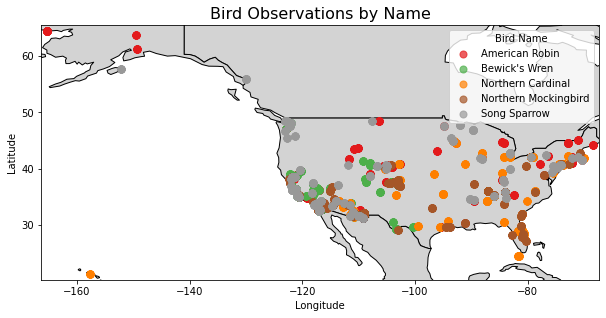

In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df.longitude, df.latitude)
)

# Load the world map
try:
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
except:
    # If the dataset is not available, you can load another shapefile or manually download it.
    print("Error: World shapefile not found. Please make sure 'naturalearth_lowres' is available.")
    world = gpd.read_file("path_to_some_other_shapefile/world_shapefile.shp")

# Plotting the map
fig, ax = plt.subplots(figsize=(10, 6))

# Plot world map in the background
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Create a colormap for different bird types
bird_types = gdf['name'].unique()
colormap = plt.cm.get_cmap('Set1', len(bird_types))  # Use a color palette with enough colors

# Plot bird observations with distinct colors for each bird type
for idx, (name, group) in enumerate(gdf.groupby('name')):
    group.plot(ax=ax, markersize=50, label=name, alpha=0.7, color=colormap(idx))

# Set the axis limits to focus on the data
min_long = gdf['longitude'].min()
max_long = gdf['longitude'].max()
min_lat = gdf['latitude'].min()
max_lat = gdf['latitude'].max()

# Set limits to focus the map on the data
ax.set_xlim(min_long - 1, max_long + 1)
ax.set_ylim(min_lat - 1, max_lat + 1)

# Title and labels
plt.title('Bird Observations by Name', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Bird Name')
plt.show()

## 3. 🎧 Audio Feature Extraction
### 3.1 🔬 MFCC Transformation
- Converted raw audio to Mel-Frequency Cepstral Coefficients (MFCCs)
- **Parameters**:
  - 🔢 Number of MFCCs: 13
  - 🌊 Mel filterbanks: 23
  - 📊 FFT window: 400 samples

In [13]:
import soundfile as sf
import torch
import librosa
import torchaudio.transforms as T

audio_file = '/users/enguye17/.cache/kagglehub/datasets/vinayshanbhag/bird-song-data-set/versions/1/wavfiles/363142-6.wav'
data, sample_rate = sf.read(audio_file)
waveform = torch.from_numpy(data)

n_mels = 23
n_mfcc = 13  
n_fft = 400  
hop_length = 160  

waveform = waveform.to(dtype=torch.float32)

mfcc_transform = T.MFCC(
    sample_rate=sample_rate,
    n_mfcc=n_mfcc,
    melkwargs={'n_fft': n_fft, 'hop_length': hop_length, 'n_mels': n_mels, 'center': False}
)

mfcc = mfcc_transform(waveform)

print(mfcc.shape)
def display_mfcc_plot(mfcc):
    plt.figure(figsize=(10, 5))
    plt.imshow(mfcc.squeeze().numpy(), aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(label='MFCC Coefficients')
    plt.title('MFCC of the Audio File')
    plt.xlabel('Time Frames')
    plt.ylabel('MFCC Coefficients')
    plt.tight_layout()
    plt.show()


torch.Size([13, 411])



### 3.2 🖼️ Feature Visualization
- Generated spectrograms for each bird species
- **Demonstrated**:
  - 🎵 Unique audio fingerprints
  - 🔍 Differences in bird song characteristics

American Robin


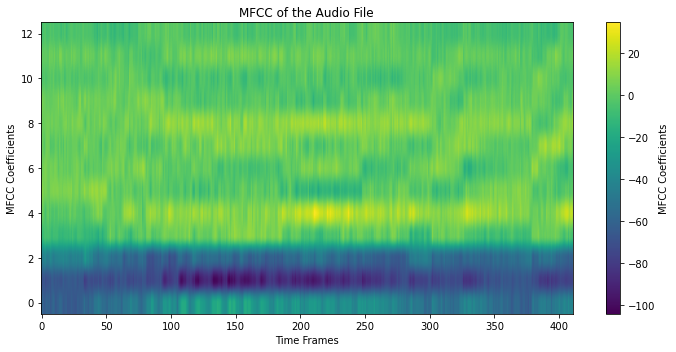

Bewick's Wren


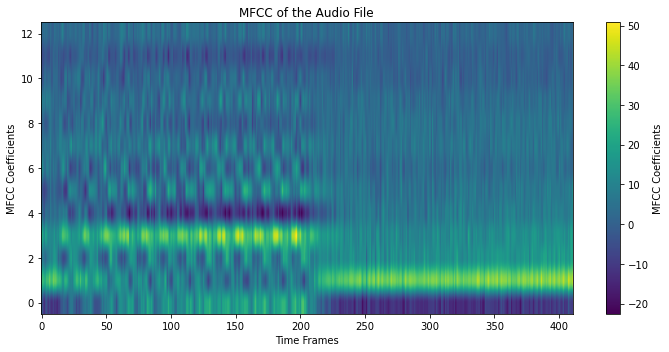

Northern Cardinal


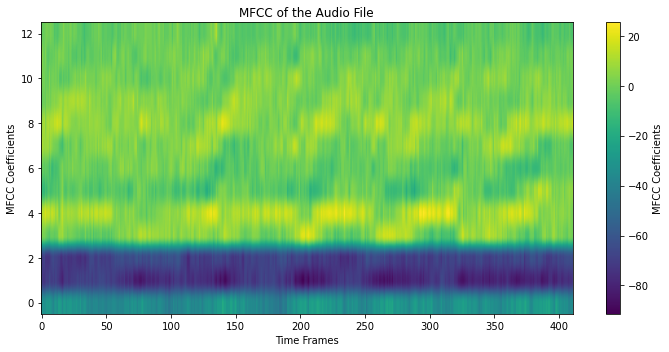

Northern Mockingbird


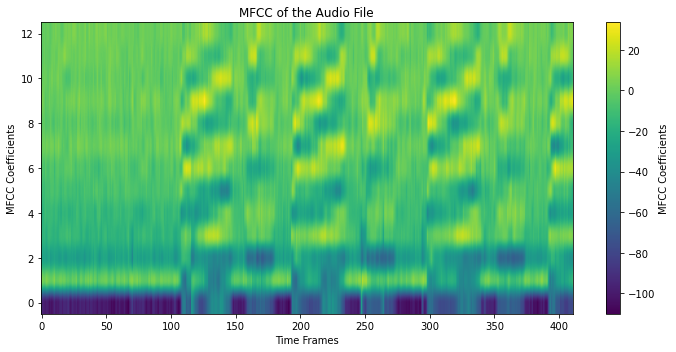

Song Sparrow


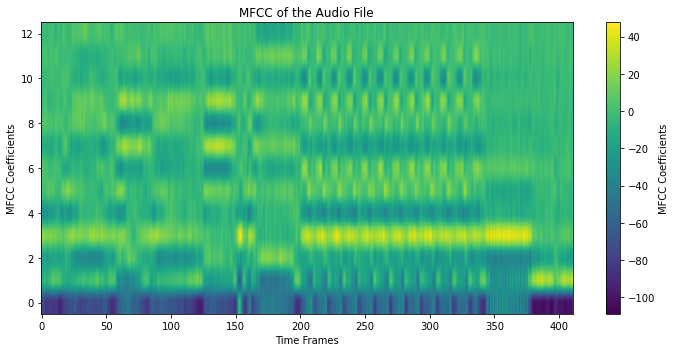

In [14]:
unique_files = df.groupby('name')['filename'].first().reset_index()

for birdsound_file,bird_name in zip(unique_files['filename'],unique_files['name'],):
    print(bird_name)
    
    audio_file = path+'/wavfiles/'+birdsound_file
    data, sample_rate = sf.read(audio_file)
    waveform = torch.from_numpy(data)
    
    waveform = waveform.to(dtype=torch.float32)    
    
    mfcc_transform = T.MFCC(
    sample_rate=sample_rate,
    n_mfcc=13,
    melkwargs={'n_fft': 400, 'hop_length': 160, 'n_mels': 23, 'center': False}
    )

    mfcc = mfcc_transform(waveform)
    
    display(Audio(audio_file, autoplay=False))
    display_mfcc_plot(mfcc)

In [15]:
import geopandas as gpd

gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [16]:
import torch
cuda_available = torch.cuda.is_available()
print(cuda_available)

True


## 4. 🧩 Custom Audio Dataset

### 4.1 📁 Dataset Preparation
- Created custom PyTorch Dataset class
- **Implemented**:
  - 🏷️ One-hot encoding for bird species
  - 🔄 Standardized audio feature extraction

### 4.2 📊 Data Splitting
- Stratified train-test-validation split
- **Ensured**:
  - 🌈 Balanced representation of bird species
- **Split ratios**:
  - 🚂 Training: 80%
  - 🚉 Validation: 10%
  - 🚊 Testing: 10%

In [17]:
import torch
import torchaudio
from torch.utils.data import Dataset
import pandas as pd
import torchaudio.transforms as T
import soundfile as sf
from sklearn.preprocessing import OneHotEncoder

class AudioDataset(Dataset):
    def __init__(self, df, AUDIO_DIR, transform=None):

        self.df = df
        self.transform = transform
        self.path = AUDIO_DIR
        #self.encoder = OneHotEncoder(sparse=False)  #threw warnings for catagorical data, randomly ordered data as well!
        #self.labels = self.encoder.fit_transform(df[['name']])
        
        unique_names = df['name'].unique()
        
        self.encoding_dict = {'Northern Mockingbird': torch.tensor([1., 0., 0., 0., 0.]),
 'Song Sparrow': torch.tensor([0., 1., 0., 0., 0.]),
 'American Robin': torch.tensor([0., 0., 1., 0., 0.]),
 'Northern Cardinal': torch.tensor([0., 0., 0., 1., 0.]),
 "Bewick's Wren": torch.tensor([0., 0., 0., 0., 1.])}
        
    def __len__(self)->int:
        return len(self.df)
    
    def __getitem__(self, idx):
        audio_filename = self.df.iloc[idx]['filename']
        label = self.df.iloc[idx]['name']
        one_hot_label = self.encoding_dict[label]
        
        
        path = self.path+'/'+audio_filename
        
        data, sample_rate = sf.read(path)
        waveform = torch.from_numpy(data)
        
        n_mels = 23
        n_mfcc = 13  
        n_fft = 400  
        hop_length = 160  

        waveform = waveform.to(dtype=torch.float32)
        
        mfcc_transform = T.MFCC(
            sample_rate=sample_rate,
            n_mfcc=n_mfcc,
            melkwargs={'n_fft': n_fft, 'hop_length': hop_length, 'n_mels': n_mels, 'center': False}
        )

        mfcc = mfcc_transform(waveform)
        
        mfcc = mfcc.unsqueeze(0)  # Add channel dimension
    
        if self.transform:
            mfcc = self.transform(mfcc)
            
        

        return mfcc, one_hot_label

from torch.utils.data import DataLoader


wavfiles_path = path + '/wavfiles'

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['name'])
test_df, valid_df = train_test_split(df, test_size=0.5, random_state=42, stratify=df['name'])

audio_dataset = AudioDataset(df=train_df,AUDIO_DIR=wavfiles_path)
valid_audio_dataset = AudioDataset(valid_df,AUDIO_DIR=wavfiles_path)


In [18]:
data_loader = DataLoader(audio_dataset, batch_size=32, shuffle=True)
valid_dataloader = DataLoader(valid_audio_dataset, batch_size=32, shuffle=True)

In [19]:
AudioDataset(valid_df,AUDIO_DIR=wavfiles_path).encoding_dict

{'Northern Mockingbird': tensor([1., 0., 0., 0., 0.]),
 'Song Sparrow': tensor([0., 1., 0., 0., 0.]),
 'American Robin': tensor([0., 0., 1., 0., 0.]),
 'Northern Cardinal': tensor([0., 0., 0., 1., 0.]),
 "Bewick's Wren": tensor([0., 0., 0., 0., 1.])}

In [20]:
for batch_idx, (mfccs, labels) in enumerate(data_loader):
    # Your training logic here
    #print(mfccs.shape)  # Check the shape of the MFCC features
    #print(labels.shape)


SyntaxError: unexpected EOF while parsing (2009646745.py, line 4)

In [23]:
print(os.path.exists('/users/enguye17/.cache/kagglehub/datasets/vinayshanbhag/bird-song-data-set/versions/1/wavfiles/363142-6.wav'))

True


In [24]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

torch.random.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

#torchaudio.utils.sox_utils.list_read_formats()
#torchaudio.utils.ffmpeg_utils.get_audio_decoders()

audio_filename= '/users/enguye17/.cache/kagglehub/datasets/vinayshanbhag/bird-song-data-set/versions/1/wavfiles/363142-6.wav'

print(sample_rate)
print(waveform)

2.4.1+cu121
2.4.1+cu121
cuda
22050
tensor([-0.0242,  0.0067,  0.0203,  ...,  0.0044,  0.0056,  0.0057])


## 5. 🧠 Neural Network Models

### 5.1 📡 Convolutional Neural Network (CNN)
- 4 convolutional blocks
- **Key architecture**:
  - 🖼️ Input: 1-channel MFCC
  - 🔍 Progressively increasing feature maps
  - 🏋️ Max pooling for dimensionality reduction
- **Total trainable parameters**: 558469

### 5.2 🌊 Long Short-Term Memory (LSTM)
- Bidirectional LSTM architecture
- **Features**:
  - 🕰️ Temporal feature learning
  - 🛡️ Dropout for regularization
- **Total trainable parameters**: 131717 

In [25]:
import torch
from torch import nn
from torchsummary import summary

class CNNNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # 4 conv blocks / flatten / linear / softmax
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=16,
                out_channels=32,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(
                in_channels=32,
                out_channels=64,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(
                in_channels=64,
                out_channels=128,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.flatten = nn.Flatten()
        
        # Correctly set up the linear layer
        self.linear = nn.Linear(128*2*27, 5)
        
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_data):
        x = self.conv1(input_data)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        
        x = self.flatten(x)
        #print(f'flattened shape of X: {x.shape}')
        logits = self.linear(x)
        predictions = self.softmax(logits)
        #print(f'Predictionion shape {predictions.shape}')
        return predictions

if __name__ == "__main__":
    cnn = CNNNetwork()
    summary(cnn.cuda(), (1, 13, 411))
    
class MFCCLSTMClassifier(nn.Module):
    def __init__(self, input_size=13, hidden_size=128, num_layers=2, num_classes=5):
        super(MFCCLSTMClassifier, self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=True
        )
        
        self.fc = nn.Sequential(
            nn.Linear(hidden_size * 2, 64),  
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, num_classes)
        )
        
    def forward(self, x):
        if x.dim() == 4:
            x = x.squeeze(1)  # Remove channel dimension if it's 1
        elif x.dim() == 2:
            x = x.unsqueeze(0)
        x = x.transpose(1, 2)
        
        # Ensure correct number of features
        if x.size(-1) != self.input_size:
            raise ValueError(f"Expected input features {self.input_size}, got {x.size(-1)}")
        
        # LSTM output
        lstm_out, (hidden, cell) = self.lstm(x)
        
        # Take the last output from both forward and backward
        # Concatenate forward and backward hidden states
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        
        # Classification
        output = self.fc(hidden)
        
        return output
    
batch_size = 32
seq_len = 411
features = 13

input_tensor = torch.randn(batch_size, features,seq_len)
model = MFCCLSTMClassifier()
output = model(input_tensor)
print(output.shape)  

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 16, 15, 413]             160
              ReLU-2          [-1, 16, 15, 413]               0
         MaxPool2d-3           [-1, 16, 7, 206]               0
            Conv2d-4           [-1, 32, 9, 208]           4,640
              ReLU-5           [-1, 32, 9, 208]               0
         MaxPool2d-6           [-1, 32, 4, 104]               0
            Conv2d-7           [-1, 64, 6, 106]          18,496
              ReLU-8           [-1, 64, 6, 106]               0
         MaxPool2d-9            [-1, 64, 3, 53]               0
           Conv2d-10           [-1, 128, 5, 55]          73,856
             ReLU-11           [-1, 128, 5, 55]               0
        MaxPool2d-12           [-1, 128, 2, 27]               0
          Flatten-13                 [-1, 6912]               0
           Linear-14                   

## 6. 🏆 Training and Evaluation

### 6.1 🏋️ Training Process
- Used Adam optimizer
- Cross-entropy loss function
- **Training details**:
  - 🔄 40 epochs
  - 📈 Tracked metrics:
    * 📉 Training loss
    * 🎯 Training accuracy
    * 📊 Learning curves generated

In [66]:
from torch.nn import CrossEntropyLoss
from torch import optim

import torch
import torch.optim as optim
from torch.nn import CrossEntropyLoss
import matplotlib.pyplot as plt
import pickle

def train(model, data_loader, device, epochs, criterion):
    optimiser = optim.Adam(model.parameters(), lr=0.0001)
    loss_per_epoch = []  # List to store loss at each epoch
    accuracy_per_epoch = []  # List to store accuracy at each epoch

    criterion = CrossEntropyLoss()

    for epoch in range(epochs):
        total_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        model.train()  # Set the model to training mode

        for input, target in data_loader:
            input, target = input.to(device), target.to(device)

            prediction = model(input)  # Get raw logits from the model

            # Convert one-hot target to class indices if necessary
            target = torch.argmax(target, dim=1)
            loss = criterion(prediction, target)
            total_loss += loss.item()

            # Compute accuracy
            _, predicted_classes = torch.max(prediction, dim=1)  # Get the predicted class indices
            correct_predictions += (predicted_classes == target).sum().item()
            total_samples += target.size(0)

            optimiser.zero_grad()
            loss.backward()
            optimiser.step()

        # Calculate average loss and accuracy for this epoch
        average_loss = total_loss / len(data_loader)
        accuracy = 100 * correct_predictions / total_samples

        loss_per_epoch.append(average_loss)  # Store loss for plotting
        accuracy_per_epoch.append(accuracy)  # Store accuracy for plotting
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy:.2f}%')

        plt.figure(figsize=(6, 4))
        plt.plot(range(1, epoch+2), loss_per_epoch, color='b', label='Training Loss')
        plt.title(f'Training Loss Over [0-{epoch+1}]')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Plotting accuracy for all epochs so far
        plt.figure(figsize=(6, 4))
        plt.plot(range(1, epoch+2), accuracy_per_epoch, color='g', label='Training Accuracy')
        plt.title(f'Training Accuracy Over  [0-{epoch+1}]')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.legend()
        plt.grid(True)
        plt.show()


    # Saving loss and accuracy to a pickle file
    with open('loss_accuracy.pkl', 'wb') as f:
        pickle.dump({'loss': loss_per_epoch, 'accuracy': accuracy_per_epoch}, f)
    

    return model

def test_model(model, data_loader,device):

    total_loss = 0.0
    total_loss_not_correct = 0.0
    correct_predictions = 0
    total_samples = 0
    predict_total = []
    target_total = []
    criterion = CrossEntropyLoss()
    for input, target in data_loader:
        input, target = input.to(device), target.to(device)

        prediction = model(input)
        target = torch.argmax(target, dim=1)

        loss = criterion(prediction, target)

        total_loss += loss.item()
        predict_total.append(torch.argmax(prediction, dim=1))
        target_total.append(target)
        _, predicted_classes = torch.max(prediction, dim=1)  # Get the predicted class indices
        correct_predictions += (predicted_classes == target).sum().item()
        
        error_mask = 1 - (predicted_classes == target).float()
        masked_loss = error_mask * loss
        total_loss_not_correct += masked_loss.sum().item()
        
        
        total_samples += target.size(0)

        #print(f'Input shape: {input.shape}')
        #print(f'Target shape: {target.shape}')
        #print(f'Target: {target}')

    average_loss = total_loss / len(data_loader)
    average_masked_loss = total_loss_not_correct / (len(data_loader)*32-correct_predictions)
    accuracy = (correct_predictions / total_samples) * 100  # Percentage accuracy
    print(f'Total Incorrect: {len(data_loader)*32-correct_predictions}')
    print(f'Average Loss: {average_loss:.4f}')
    print(f'Accuracy: {accuracy:.2f}%')
    print(f'Masked Error Loss, Average: {average_masked_loss:.4f}')
    return [item.item() for tensor in predict_total for item in tensor],[item.item() for tensor in target_total for item in tensor]
    

### 6.2 🏅 Model Performance

#### 🥇 LSTM Model
- Validation accuracy: 93.54%
- Test accuracy: 98.89%
- **Strengths**: Temporal pattern recognition

####  🥈CNN Model
- Validation accuracy: 93.77%
- Test accuracy: 96.98%
- **Strengths**: Quick feature extraction




Epoch [1/40], Loss: 1.5667, Accuracy: 31.68%


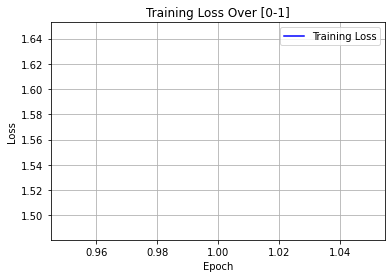

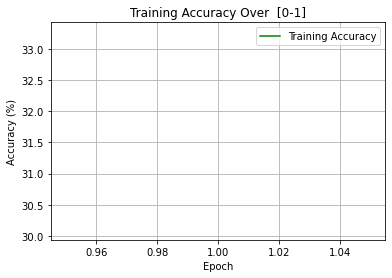

Epoch [2/40], Loss: 1.3143, Accuracy: 45.15%


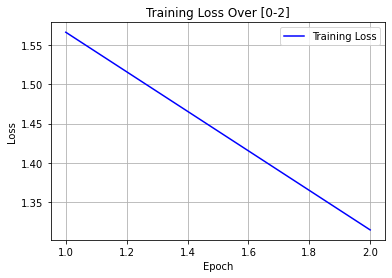

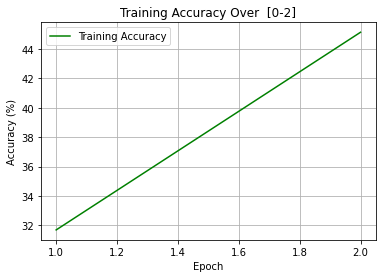

Epoch [3/40], Loss: 1.1091, Accuracy: 54.09%


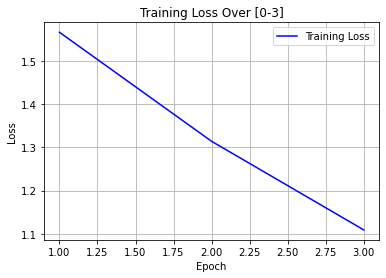

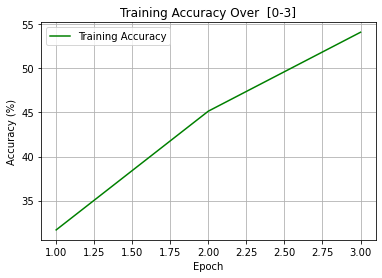

Epoch [4/40], Loss: 0.9852, Accuracy: 59.79%


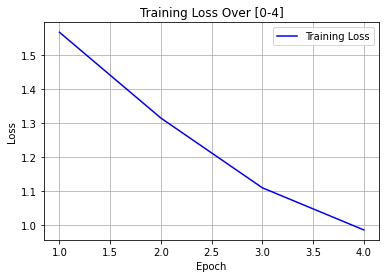

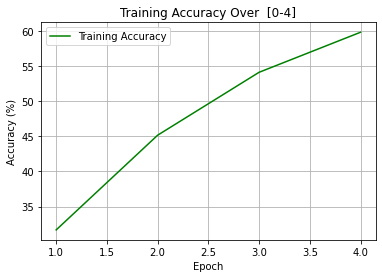

Epoch [5/40], Loss: 0.8913, Accuracy: 64.54%


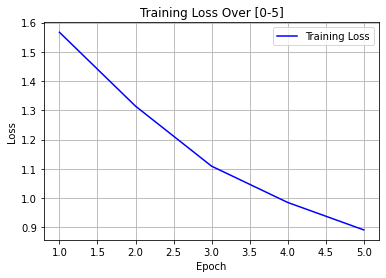

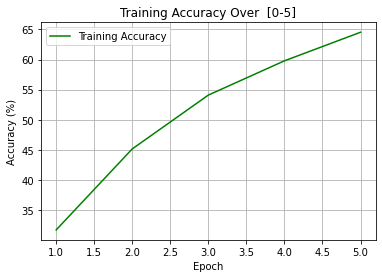

Epoch [6/40], Loss: 0.8125, Accuracy: 67.83%


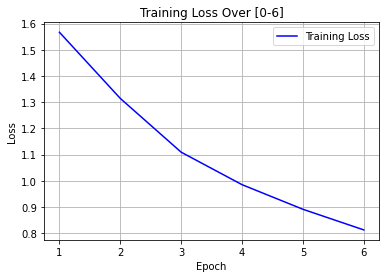

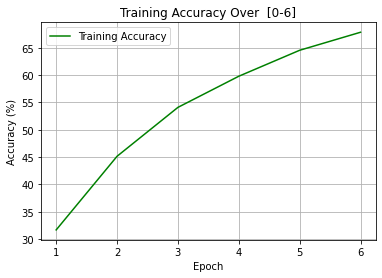

Epoch [7/40], Loss: 0.8155, Accuracy: 68.50%


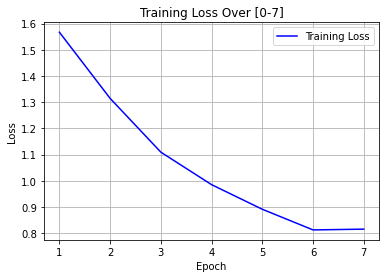

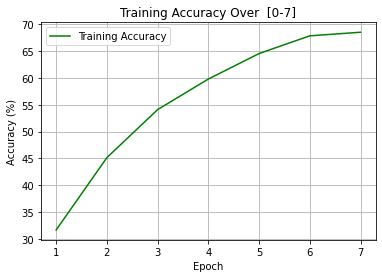

Epoch [8/40], Loss: 0.7540, Accuracy: 71.34%


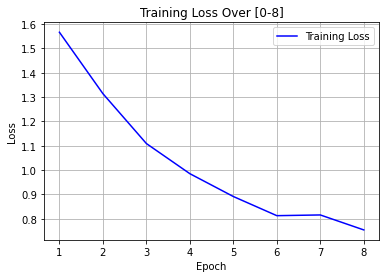

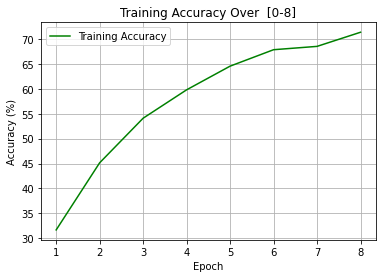

Epoch [9/40], Loss: 0.7106, Accuracy: 72.08%


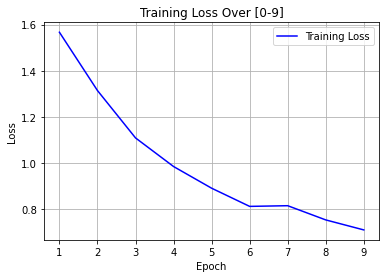

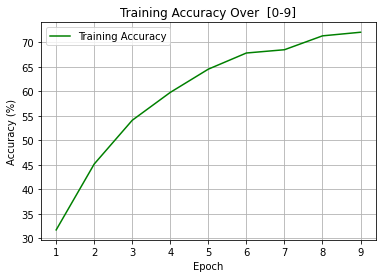

Epoch [10/40], Loss: 0.6650, Accuracy: 74.68%


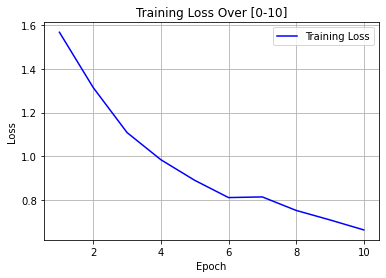

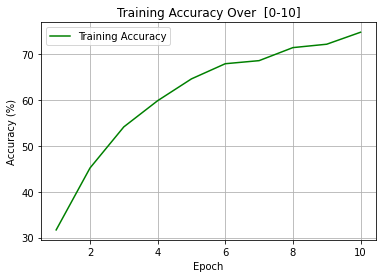

Epoch [11/40], Loss: 0.6205, Accuracy: 76.46%


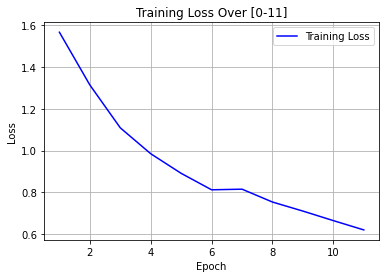

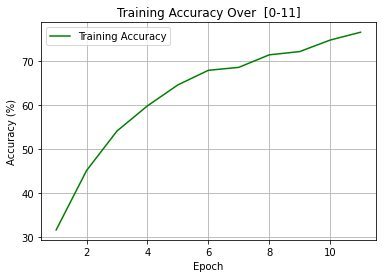

Epoch [12/40], Loss: 0.6103, Accuracy: 76.69%


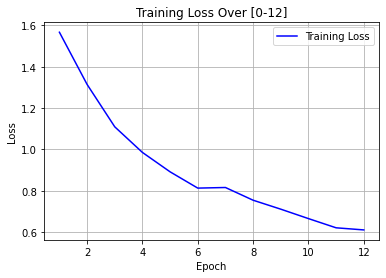

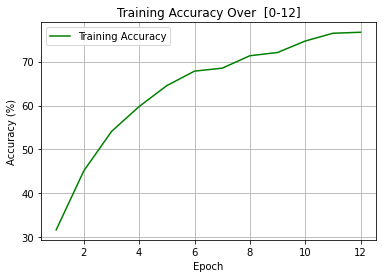

Epoch [13/40], Loss: 0.5805, Accuracy: 79.20%


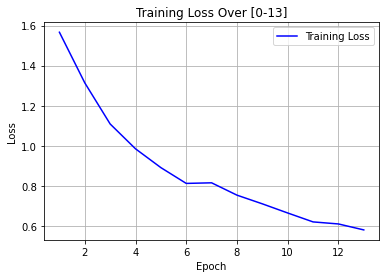

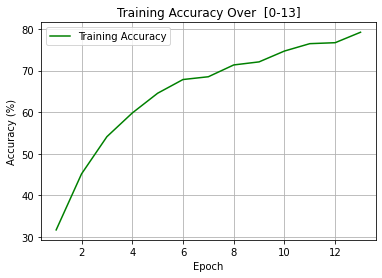

Epoch [14/40], Loss: 0.5708, Accuracy: 78.97%


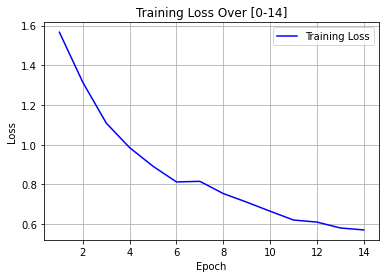

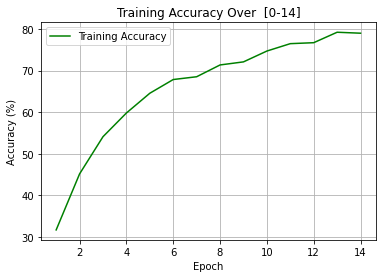

Epoch [15/40], Loss: 0.5103, Accuracy: 82.08%


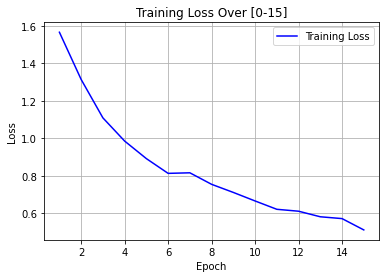

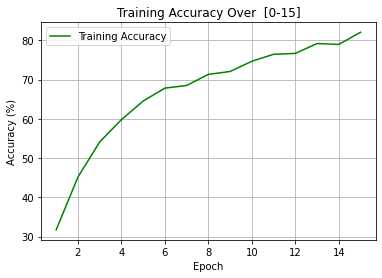

Epoch [16/40], Loss: 0.4773, Accuracy: 83.42%


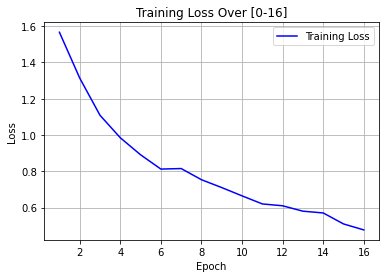

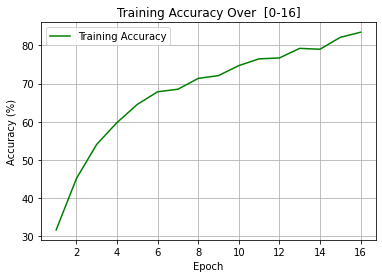

Epoch [17/40], Loss: 0.4323, Accuracy: 85.22%


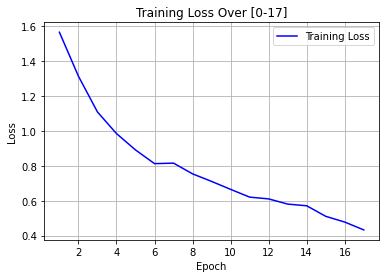

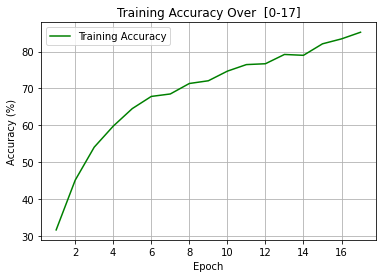

Epoch [18/40], Loss: 0.4352, Accuracy: 84.87%


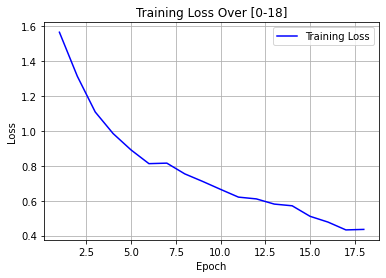

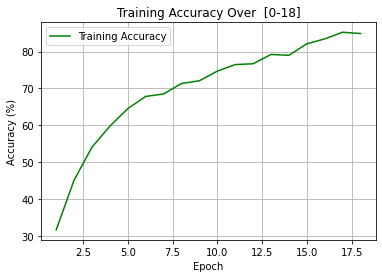

Epoch [19/40], Loss: 0.4692, Accuracy: 83.79%


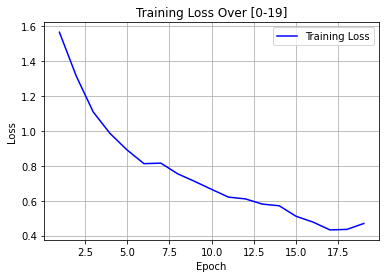

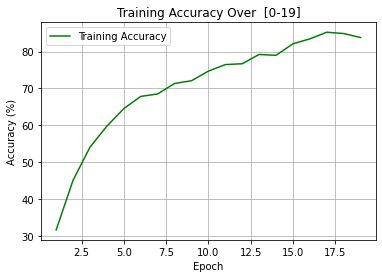

Epoch [20/40], Loss: 0.4838, Accuracy: 83.21%


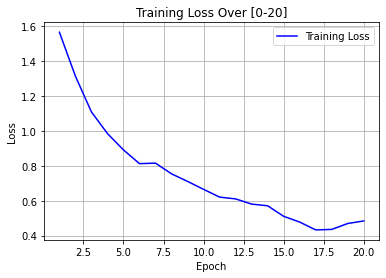

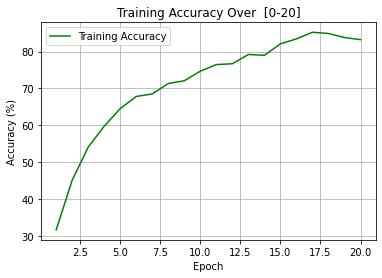

Epoch [21/40], Loss: 0.4369, Accuracy: 85.10%


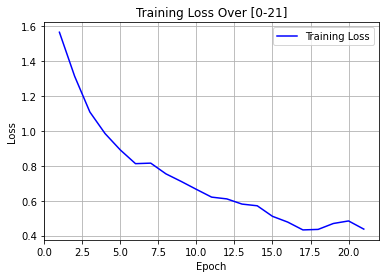

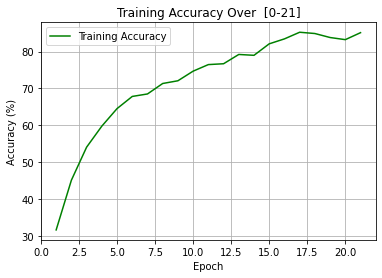

Epoch [22/40], Loss: 0.4390, Accuracy: 84.99%


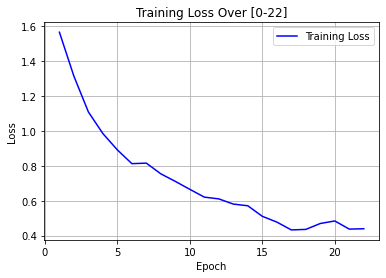

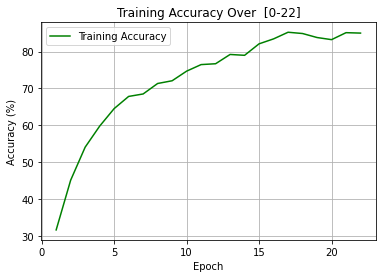

Epoch [23/40], Loss: 0.3954, Accuracy: 86.72%


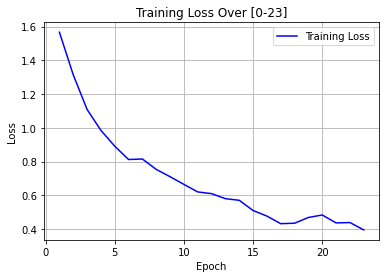

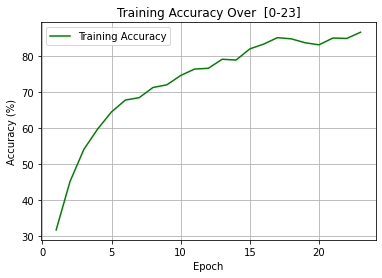

Epoch [24/40], Loss: 0.3857, Accuracy: 86.79%


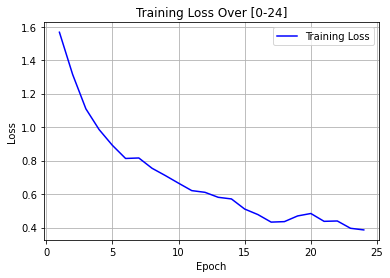

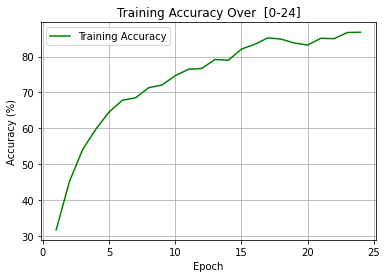

Epoch [25/40], Loss: 0.3640, Accuracy: 87.43%


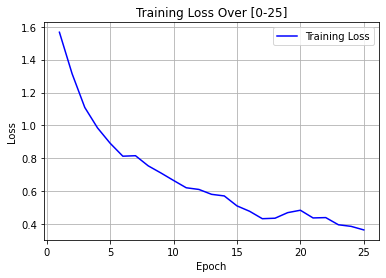

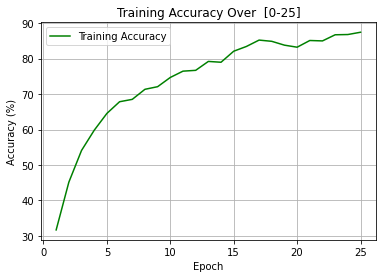

Epoch [26/40], Loss: 0.3498, Accuracy: 88.31%


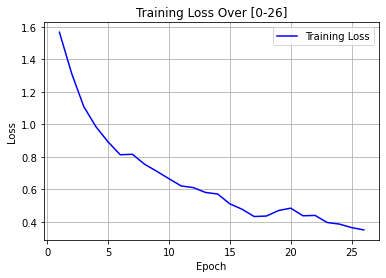

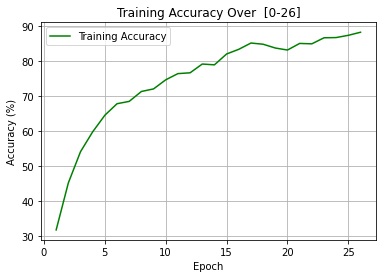

Epoch [27/40], Loss: 0.3573, Accuracy: 87.36%


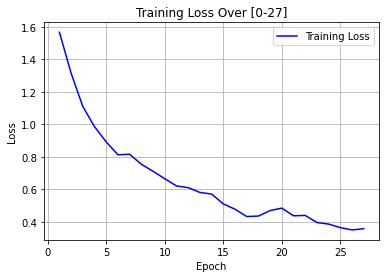

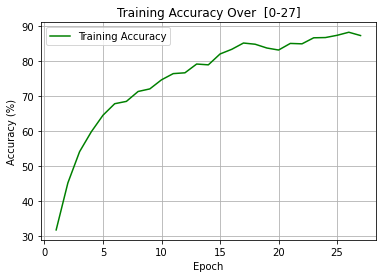

Epoch [28/40], Loss: 0.3050, Accuracy: 89.90%


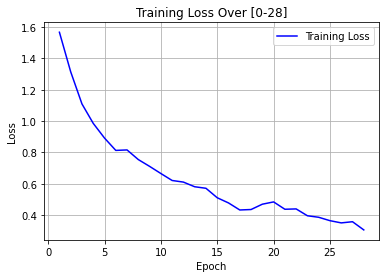

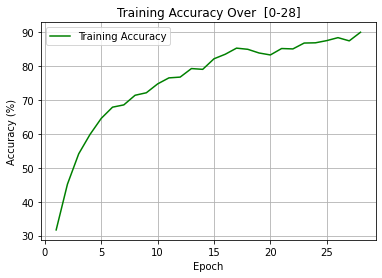

Epoch [29/40], Loss: 0.2843, Accuracy: 90.62%


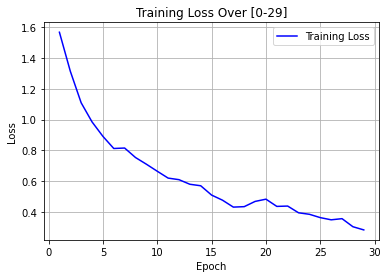

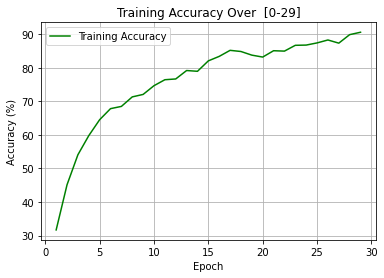

Epoch [30/40], Loss: 0.4569, Accuracy: 85.31%


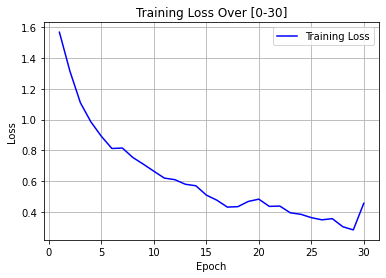

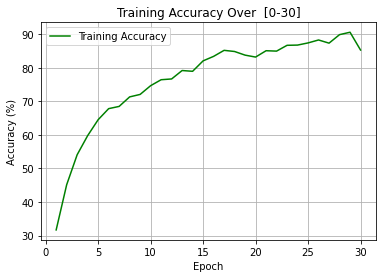

Epoch [31/40], Loss: 0.3515, Accuracy: 88.47%


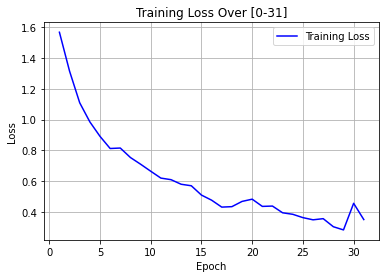

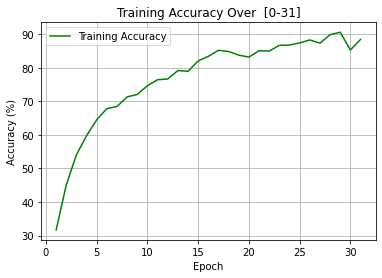

Epoch [32/40], Loss: 0.3420, Accuracy: 88.70%


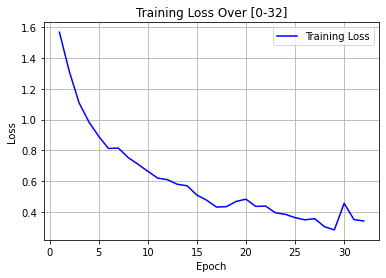

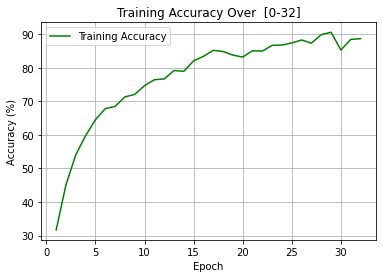

Epoch [33/40], Loss: 0.3171, Accuracy: 89.00%


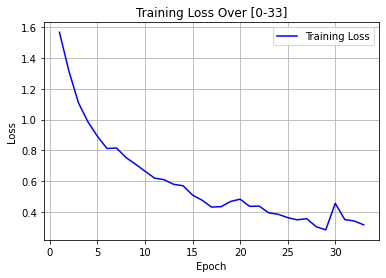

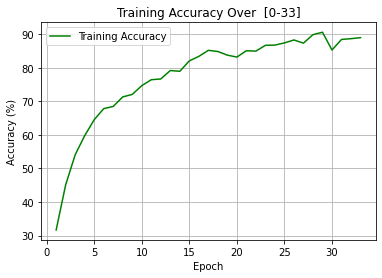

Epoch [34/40], Loss: 0.2742, Accuracy: 90.71%


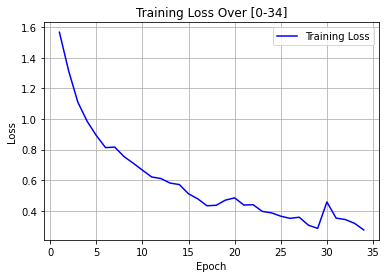

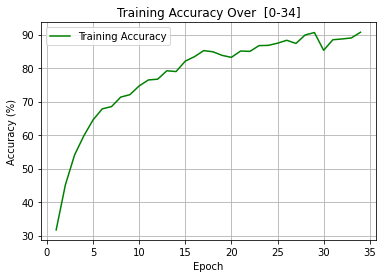

Epoch [35/40], Loss: 0.2603, Accuracy: 91.72%


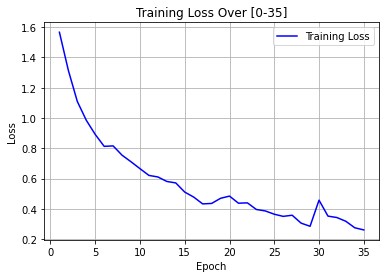

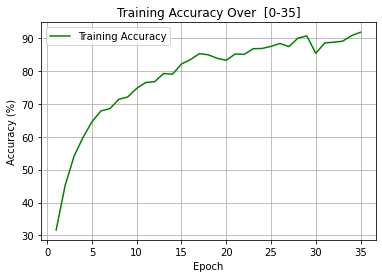

Epoch [36/40], Loss: 0.2320, Accuracy: 92.74%


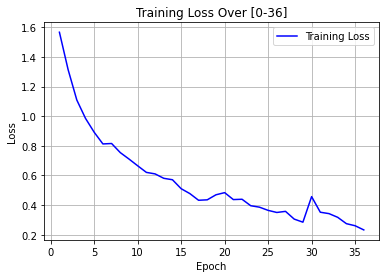

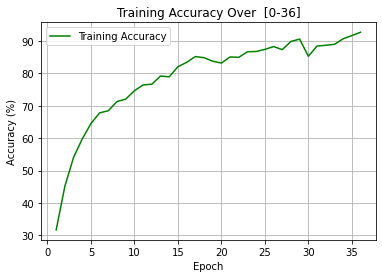

Epoch [37/40], Loss: 0.2244, Accuracy: 93.41%


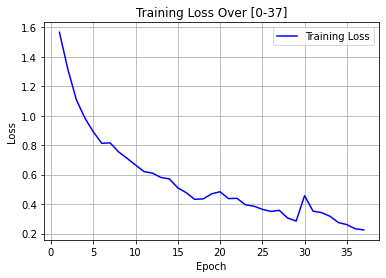

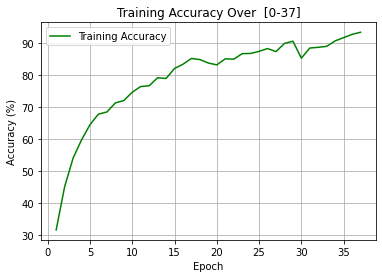

Epoch [38/40], Loss: 0.3537, Accuracy: 87.96%


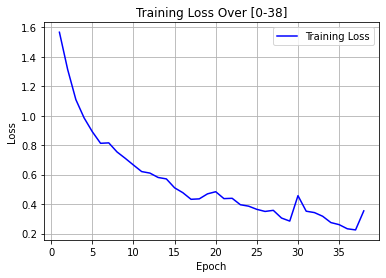

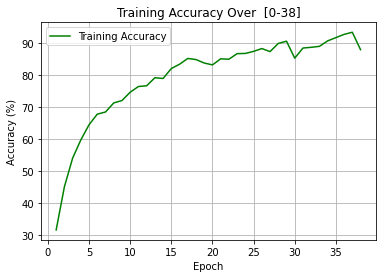

Epoch [39/40], Loss: 0.2819, Accuracy: 90.57%


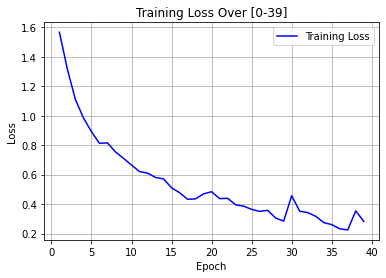

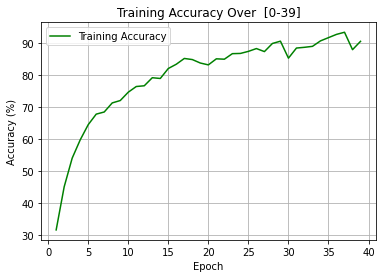

Epoch [40/40], Loss: 0.2259, Accuracy: 92.94%


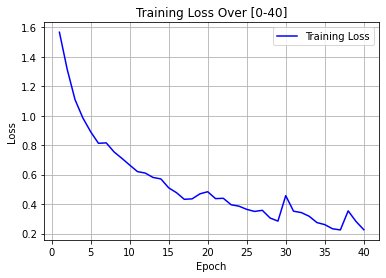

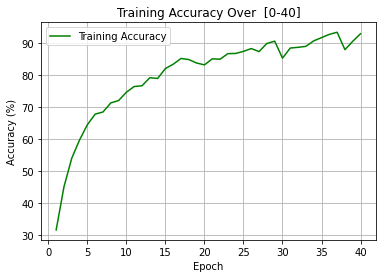

In [27]:
#model = CNNNetwork()
model_lstm = MFCCLSTMClassifier().to(device)
trained_model_ltsm = train(model_lstm, data_loader, device, 40, criterion = CrossEntropyLoss())

In [28]:
with torch.no_grad():
    predict_total, target_total = test_model(model_lstm,valid_dataloader,device)

Average Loss: 0.3471
Accuracy: 90.00%


Average Loss: 0.2698
Accuracy: 93.54%


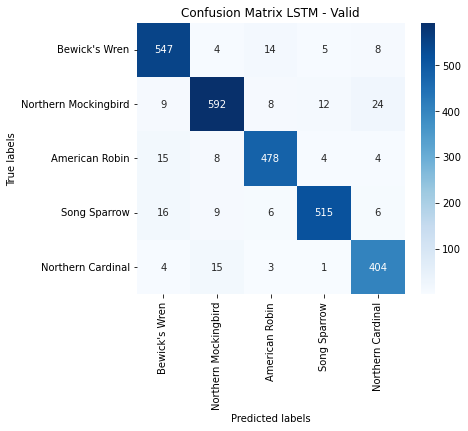

In [45]:
with torch.no_grad():
    predict_total, target_total = test_model(trained_model_ltsm,valid_dataloader,device)
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predict_total, target_total)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['name'].unique(), yticklabels=df['name'].unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix LSTM - Valid')
plt.show()

Total Incorrect: 39
Average Loss: 0.0554
Accuracy: 98.89%
Masked Error Loss, Average: 0.0872


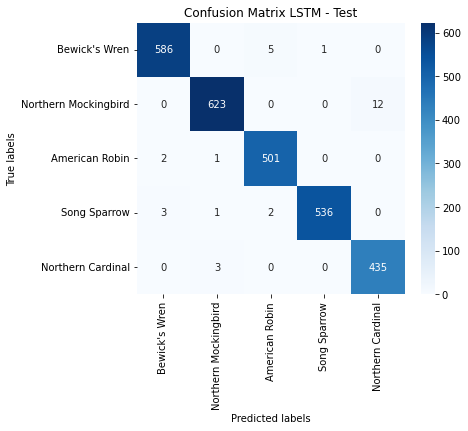

In [67]:
test_audio_dataset = AudioDataset(test_df,AUDIO_DIR=wavfiles_path)
test_dataloader = DataLoader(test_audio_dataset, batch_size=32, shuffle=True)
with torch.no_grad():
    predict_total, target_total = test_model(trained_model_ltsm,test_dataloader,device)
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predict_total, target_total)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['name'].unique(), yticklabels=df['name'].unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix LSTM - Test')
plt.show()

Epoch [1/40], Loss: 0.2242, Accuracy: 92.88%


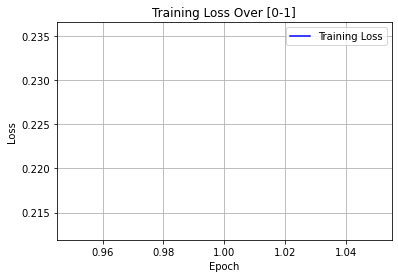

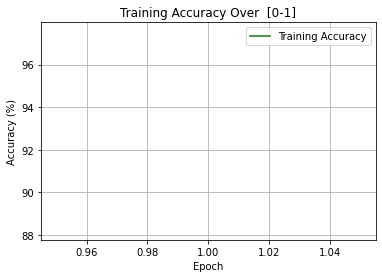

Epoch [2/40], Loss: 0.2016, Accuracy: 93.61%


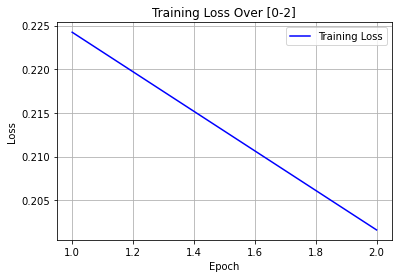

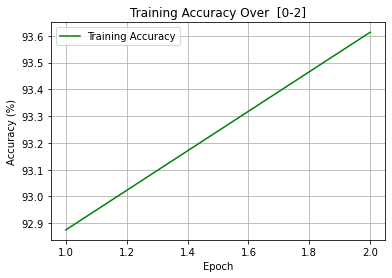

Epoch [3/40], Loss: 0.1829, Accuracy: 94.19%


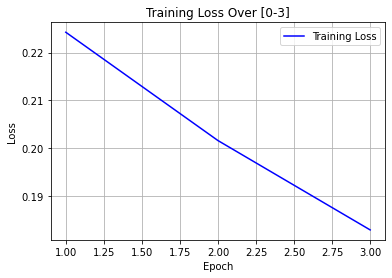

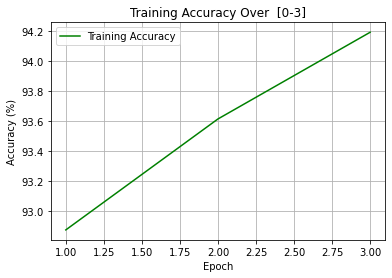

Epoch [4/40], Loss: 0.1682, Accuracy: 95.27%


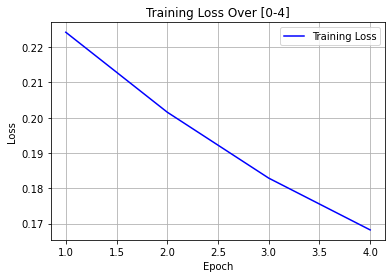

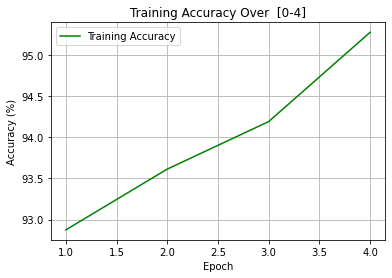

Epoch [5/40], Loss: 0.1600, Accuracy: 94.90%


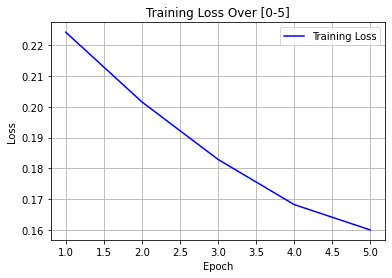

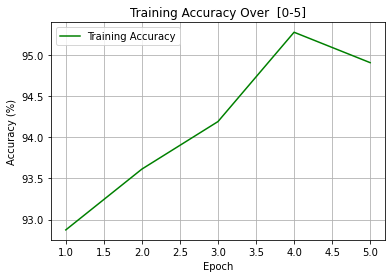

Epoch [6/40], Loss: 0.1425, Accuracy: 95.76%


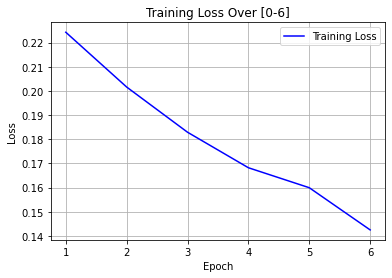

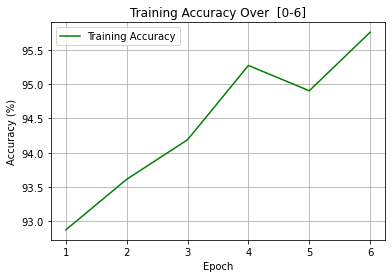

Epoch [7/40], Loss: 0.1269, Accuracy: 96.68%


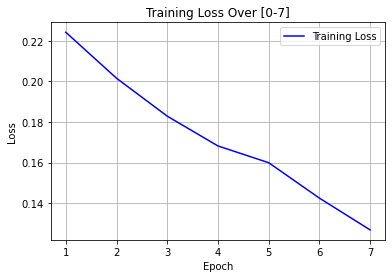

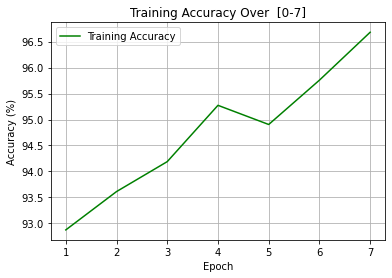

Epoch [8/40], Loss: 0.1267, Accuracy: 96.45%


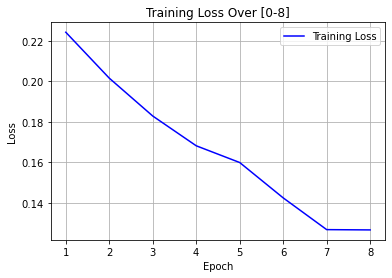

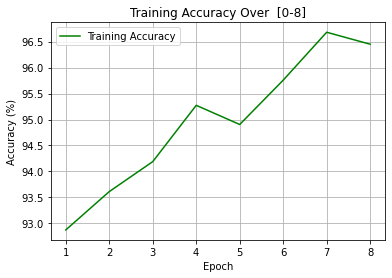

Epoch [9/40], Loss: 0.2185, Accuracy: 92.90%


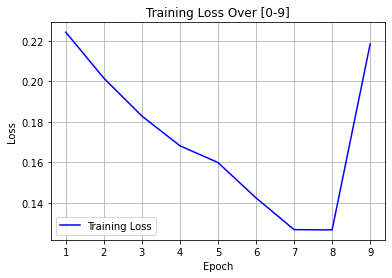

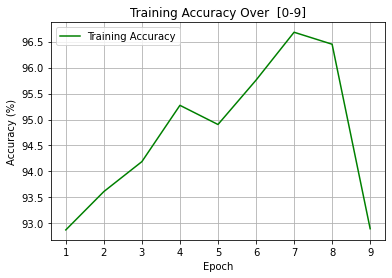

Epoch [10/40], Loss: 0.1529, Accuracy: 95.16%


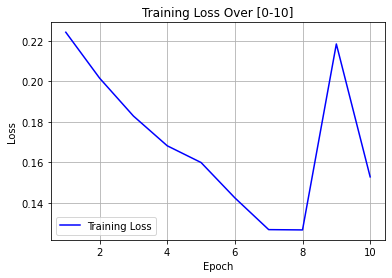

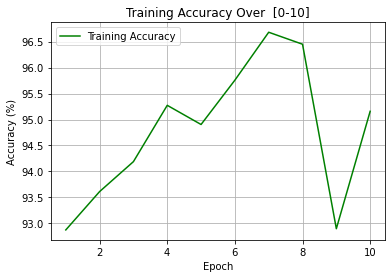

Epoch [11/40], Loss: 0.1768, Accuracy: 94.40%


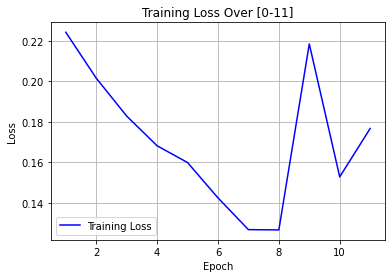

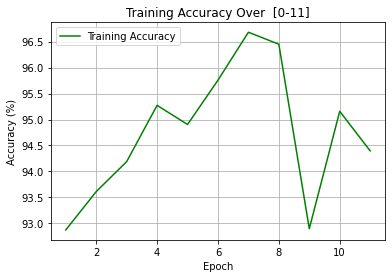

Epoch [12/40], Loss: 0.1769, Accuracy: 94.90%


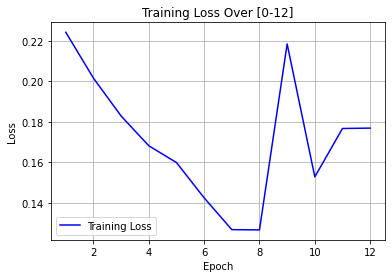

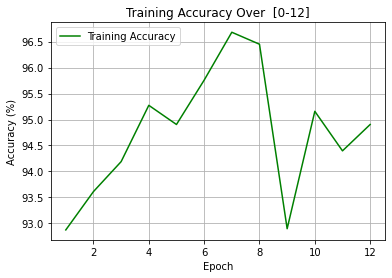

Epoch [13/40], Loss: 0.1609, Accuracy: 94.81%


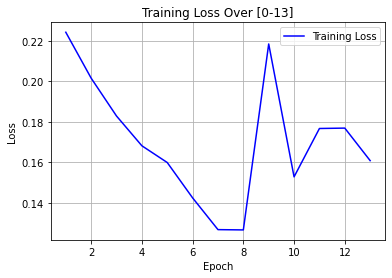

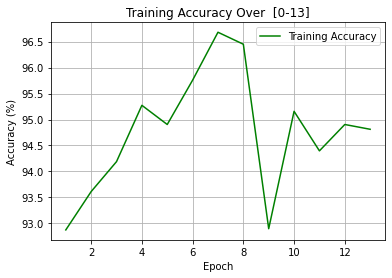

Epoch [14/40], Loss: 0.1209, Accuracy: 96.40%


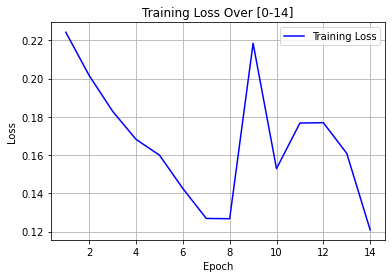

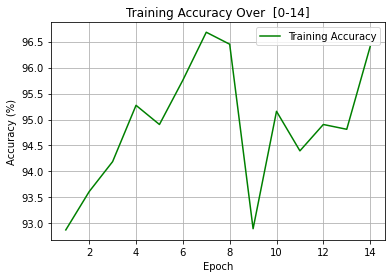

Epoch [15/40], Loss: 0.1796, Accuracy: 94.17%


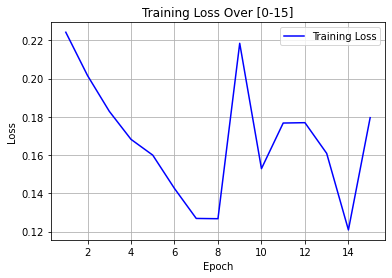

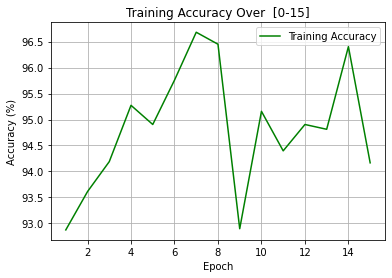

Epoch [16/40], Loss: 0.1345, Accuracy: 95.78%


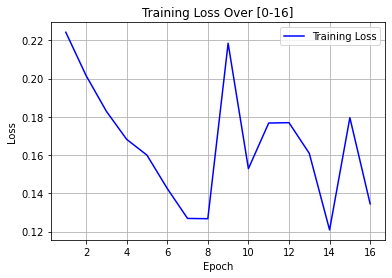

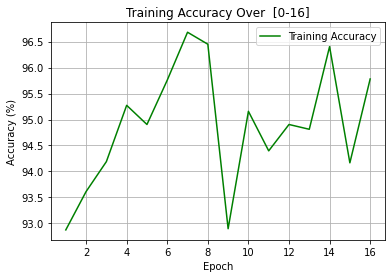

Epoch [17/40], Loss: 0.1141, Accuracy: 96.98%


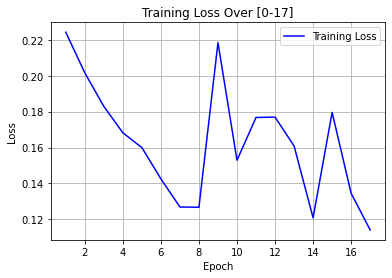

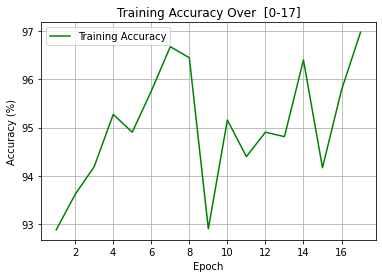

Epoch [18/40], Loss: 0.0961, Accuracy: 97.42%


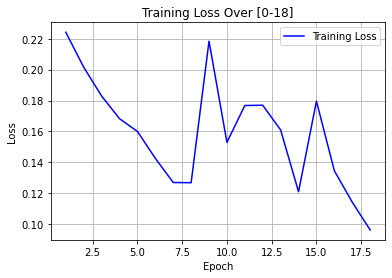

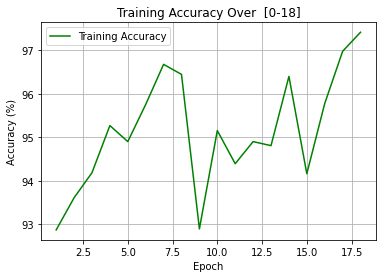

Epoch [19/40], Loss: 0.1231, Accuracy: 95.85%


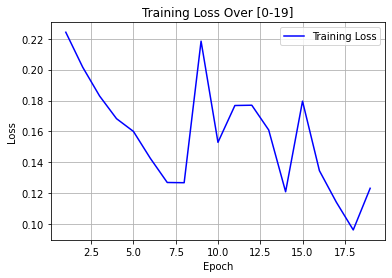

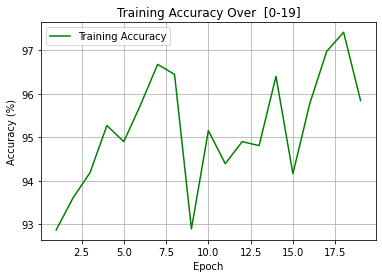

Epoch [20/40], Loss: 0.1131, Accuracy: 96.36%


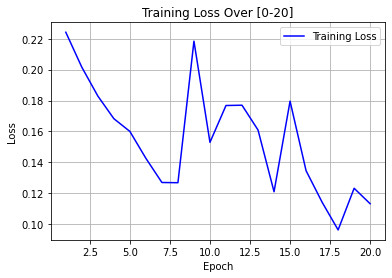

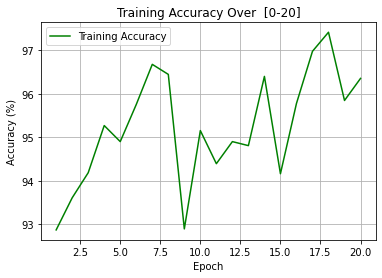

Epoch [21/40], Loss: 0.1076, Accuracy: 96.59%


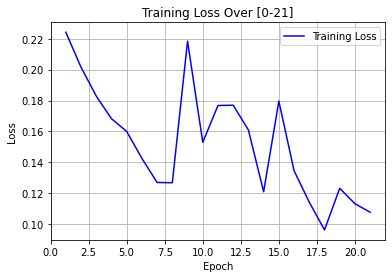

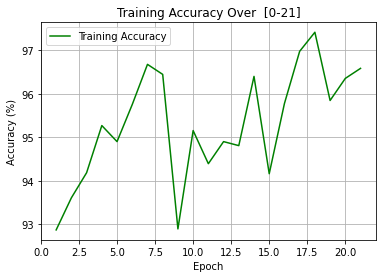

Epoch [22/40], Loss: 0.0945, Accuracy: 97.19%


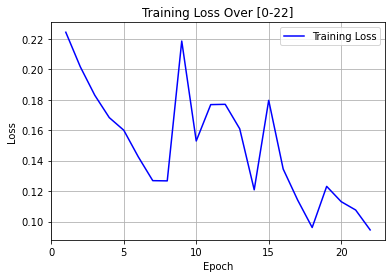

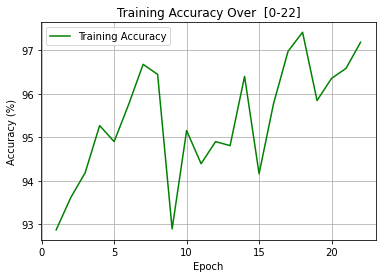

Epoch [23/40], Loss: 0.0711, Accuracy: 98.13%


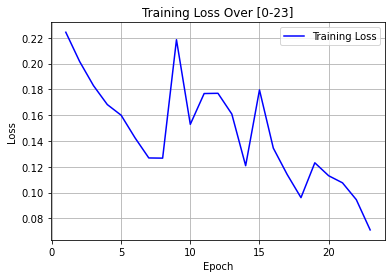

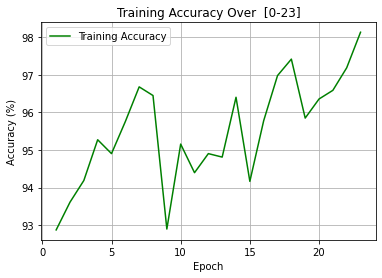

Epoch [24/40], Loss: 0.0687, Accuracy: 98.29%


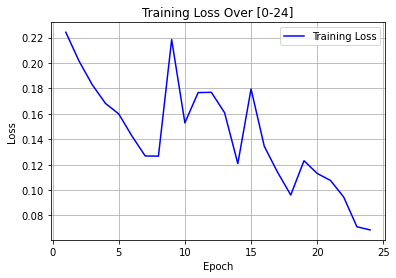

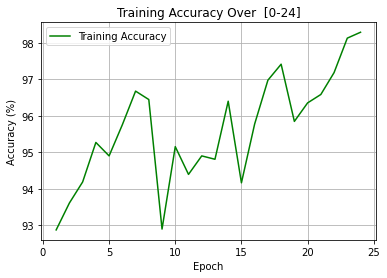

Epoch [25/40], Loss: 0.0681, Accuracy: 98.41%


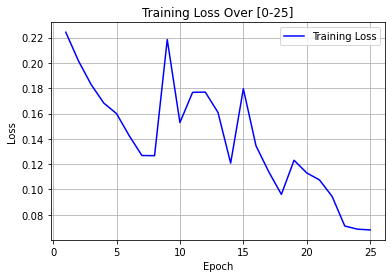

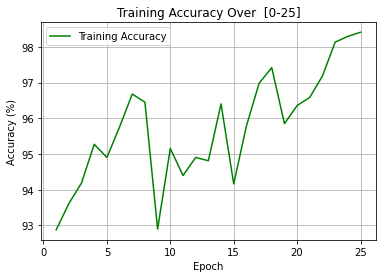

Epoch [26/40], Loss: 0.1579, Accuracy: 95.00%


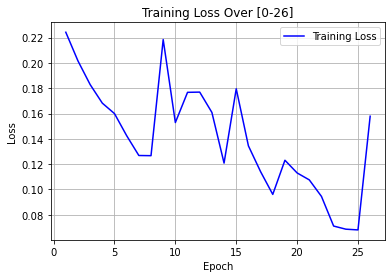

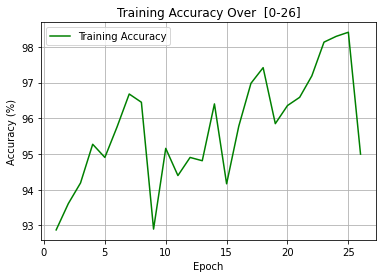

Epoch [27/40], Loss: 0.1135, Accuracy: 96.59%


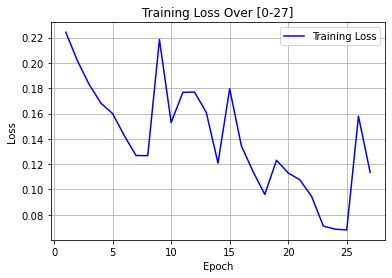

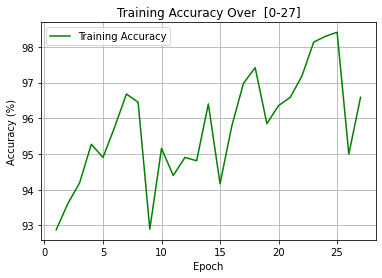

Epoch [28/40], Loss: 0.0811, Accuracy: 97.67%


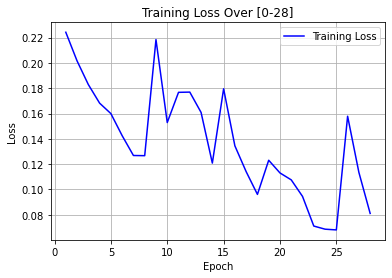

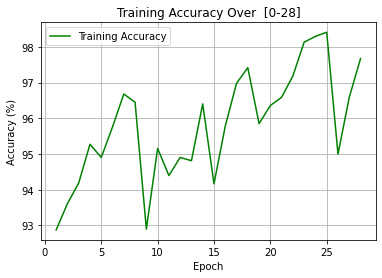

Epoch [29/40], Loss: 0.0717, Accuracy: 98.06%


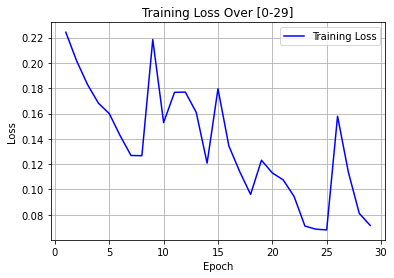

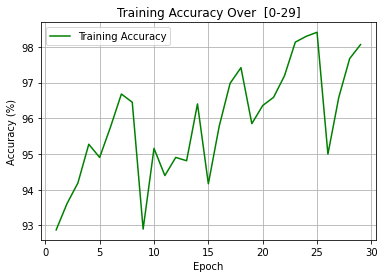

Epoch [30/40], Loss: 0.1269, Accuracy: 95.85%


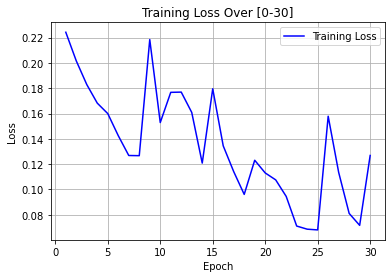

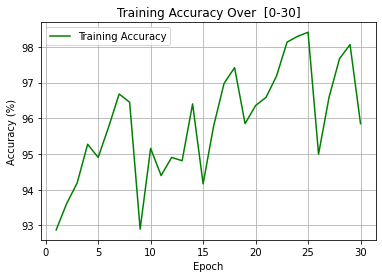

Epoch [31/40], Loss: 0.1374, Accuracy: 95.76%


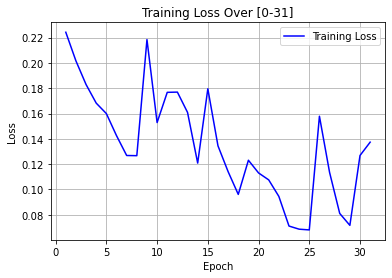

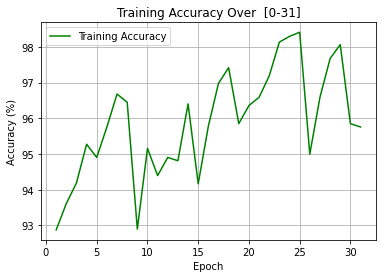

Epoch [32/40], Loss: 0.0927, Accuracy: 97.49%


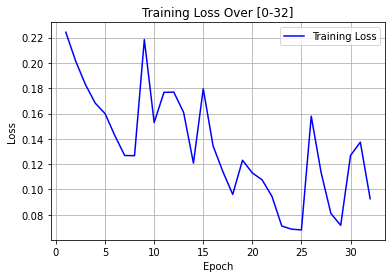

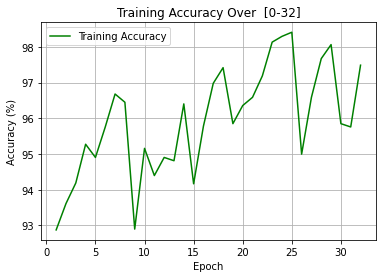

Epoch [33/40], Loss: 0.0587, Accuracy: 98.36%


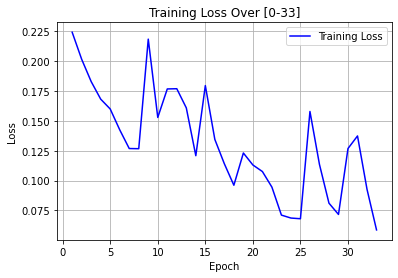

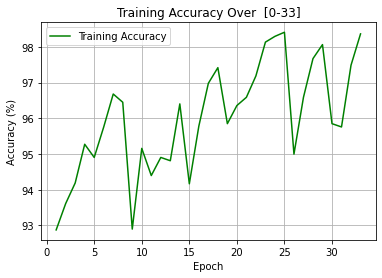

Epoch [34/40], Loss: 0.0521, Accuracy: 98.46%


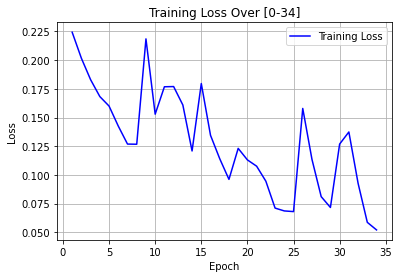

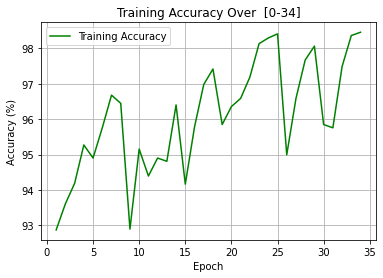

Epoch [35/40], Loss: 0.0424, Accuracy: 98.78%


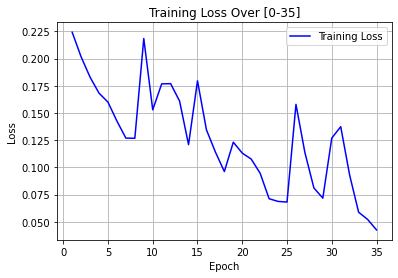

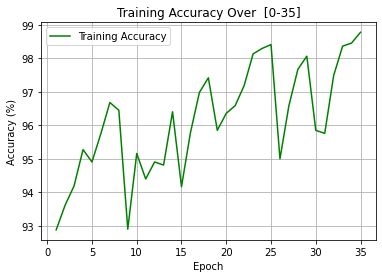

Epoch [36/40], Loss: 0.0543, Accuracy: 98.62%


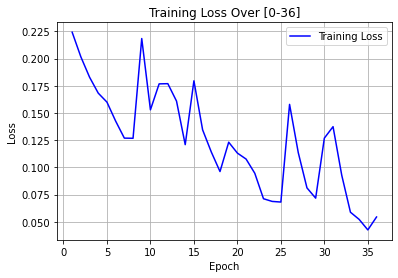

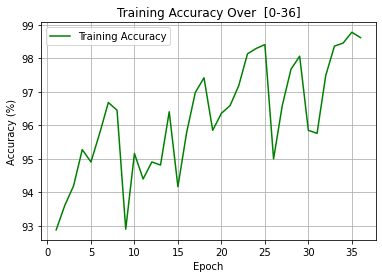

Epoch [37/40], Loss: 0.0934, Accuracy: 97.14%


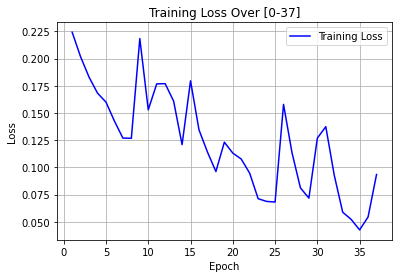

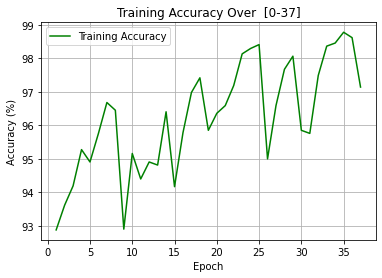

Epoch [38/40], Loss: 0.0622, Accuracy: 98.11%


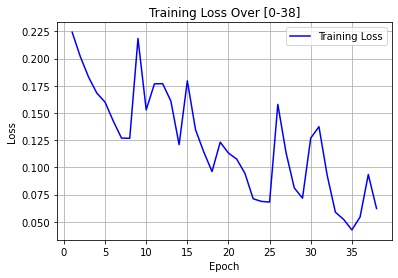

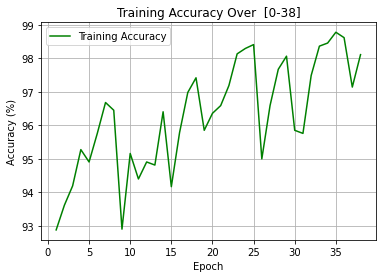

Epoch [39/40], Loss: 0.1102, Accuracy: 96.96%


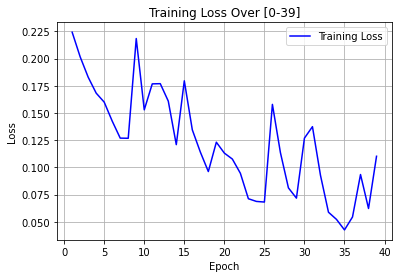

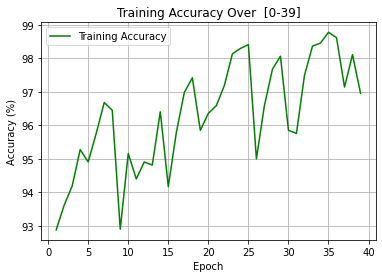

Epoch [40/40], Loss: 0.1040, Accuracy: 97.42%


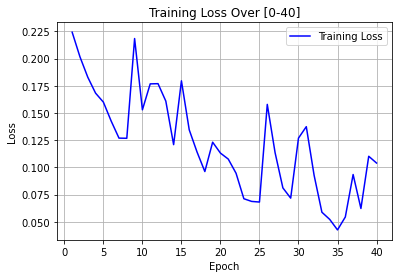

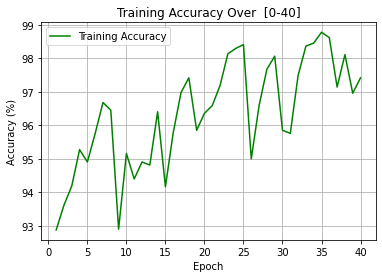

In [31]:
trained_model_cnn = train(model_cnn, data_loader, device, 40, criterion = CrossEntropyLoss())

In [32]:
trained_model_ltsm = trained_model_cnn

Epoch [1/40], Loss: 0.9637, Accuracy: 94.70%


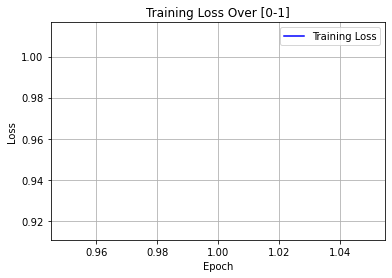

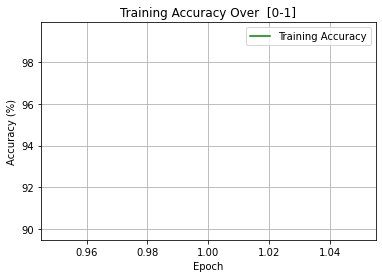

Epoch [2/40], Loss: 0.9633, Accuracy: 94.79%


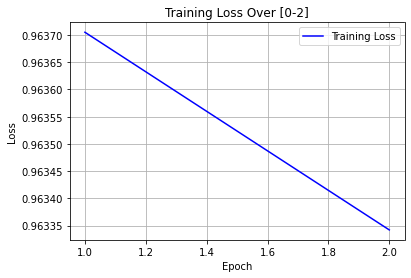

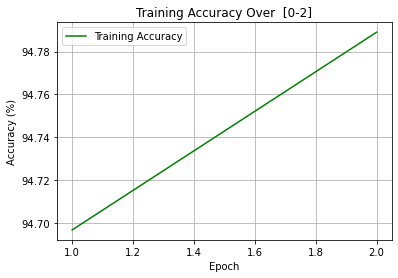

Epoch [3/40], Loss: 0.9565, Accuracy: 95.27%


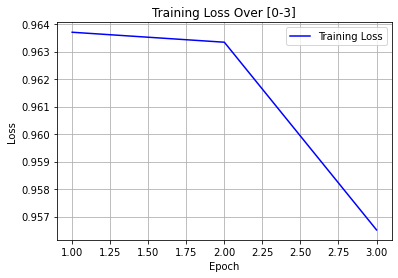

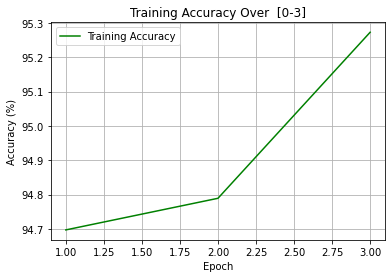

Epoch [4/40], Loss: 0.9616, Accuracy: 94.81%


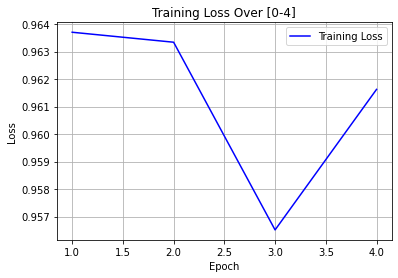

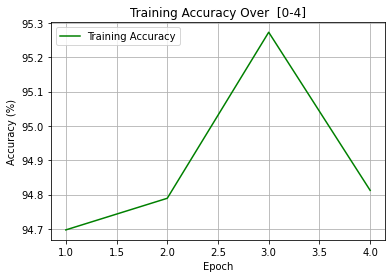

Epoch [5/40], Loss: 0.9599, Accuracy: 95.07%


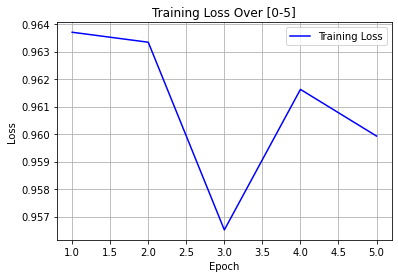

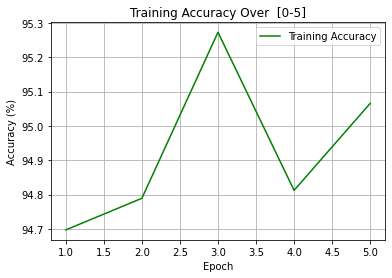

Epoch [6/40], Loss: 0.9584, Accuracy: 95.07%


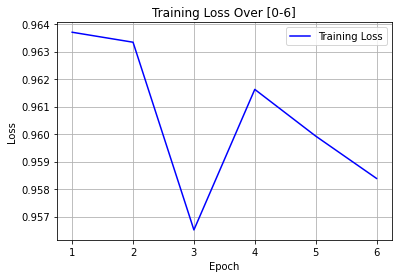

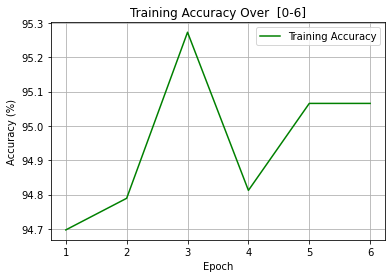

Epoch [7/40], Loss: 0.9525, Accuracy: 95.57%


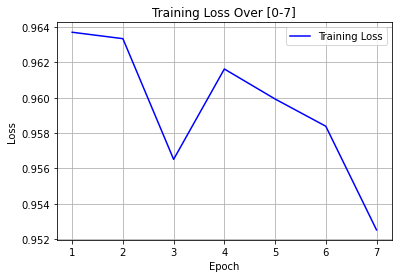

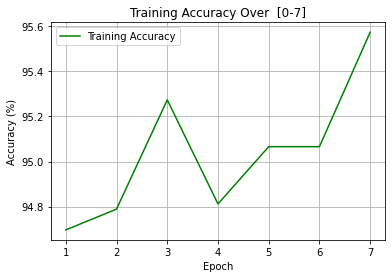

Epoch [8/40], Loss: 0.9477, Accuracy: 96.20%


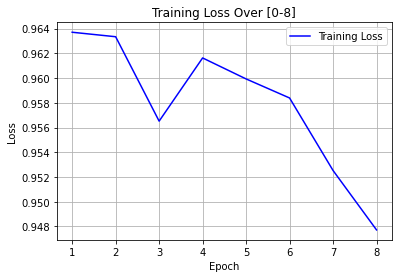

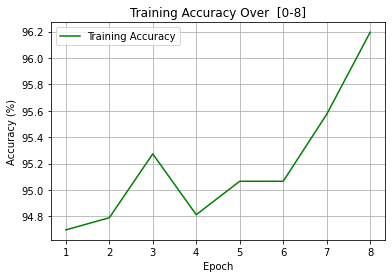

Epoch [9/40], Loss: 0.9514, Accuracy: 95.73%


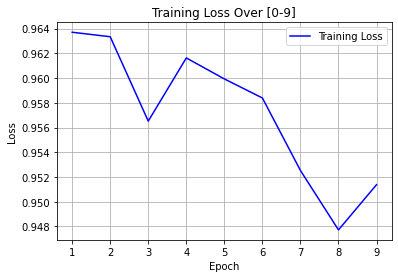

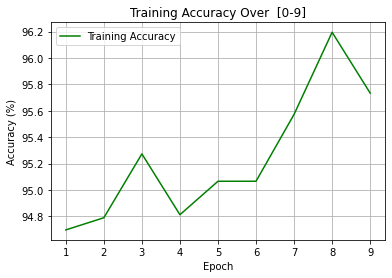

Epoch [10/40], Loss: 0.9509, Accuracy: 95.85%


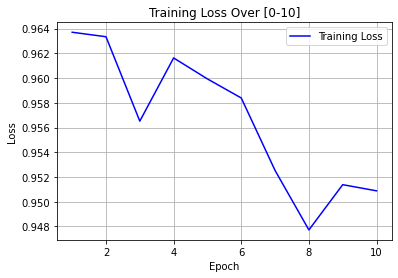

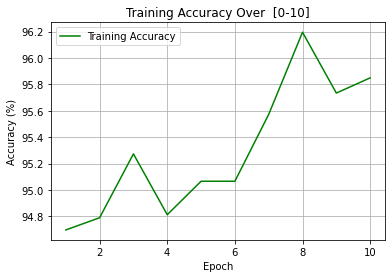

Epoch [11/40], Loss: 0.9516, Accuracy: 95.73%


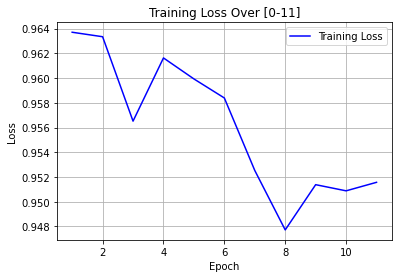

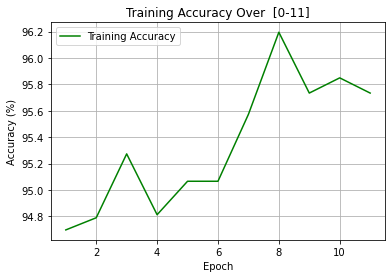

Epoch [12/40], Loss: 0.9459, Accuracy: 96.29%


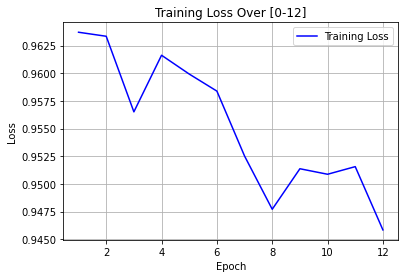

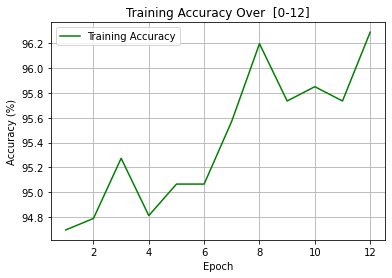

Epoch [13/40], Loss: 0.9454, Accuracy: 96.26%


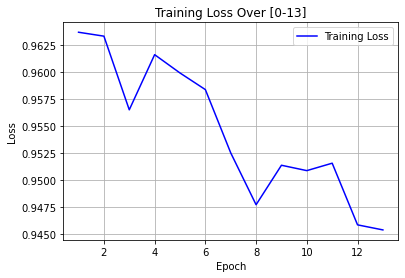

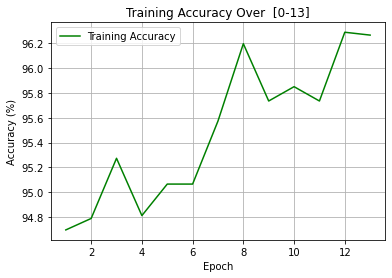

Epoch [14/40], Loss: 0.9421, Accuracy: 96.52%


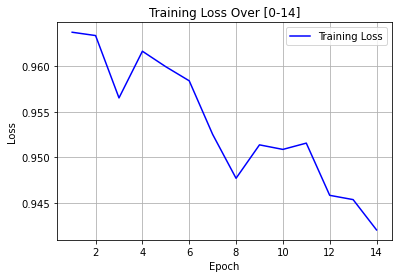

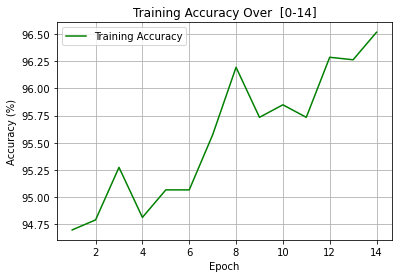

Epoch [15/40], Loss: 0.9432, Accuracy: 96.40%


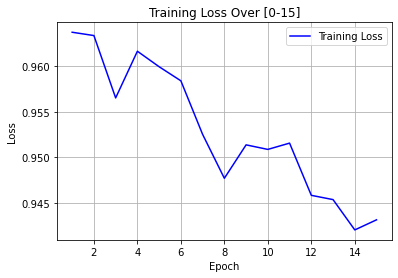

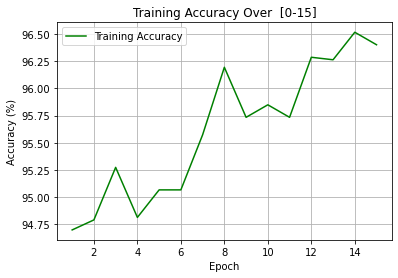

Epoch [16/40], Loss: 0.9419, Accuracy: 96.56%


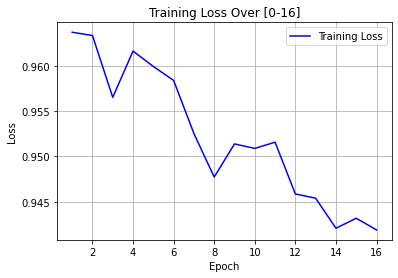

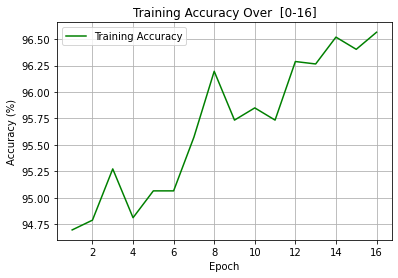

Epoch [17/40], Loss: 0.9396, Accuracy: 96.73%


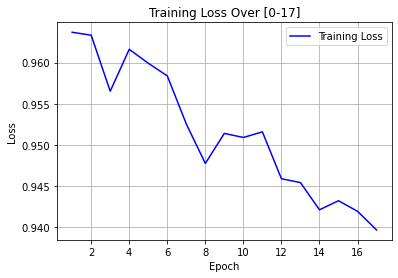

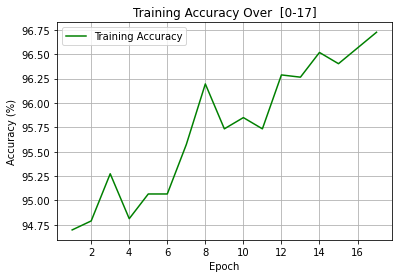

Epoch [18/40], Loss: 0.9405, Accuracy: 96.66%


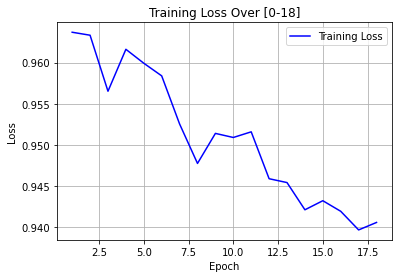

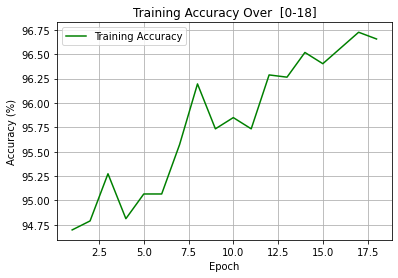

Epoch [19/40], Loss: 0.9477, Accuracy: 96.15%


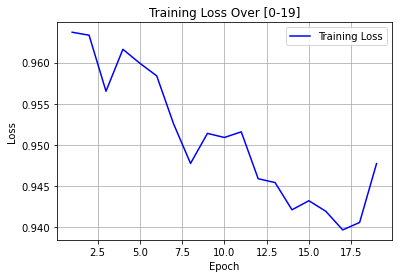

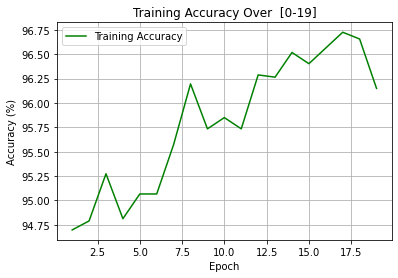

Epoch [20/40], Loss: 0.9754, Accuracy: 93.36%


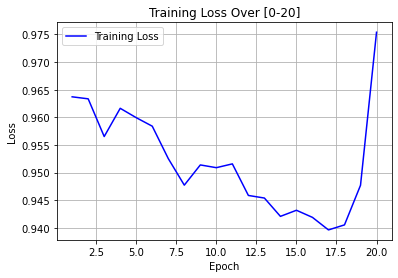

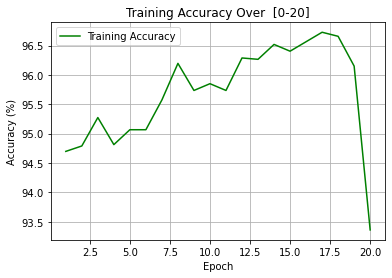

Epoch [21/40], Loss: 0.9394, Accuracy: 96.82%


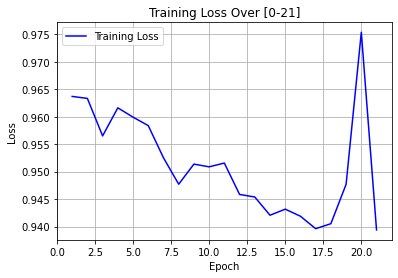

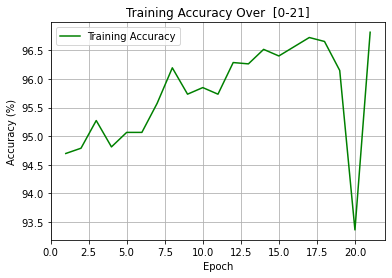

Epoch [22/40], Loss: 0.9376, Accuracy: 96.86%


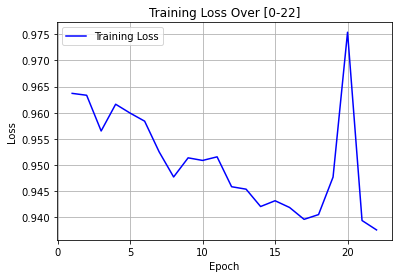

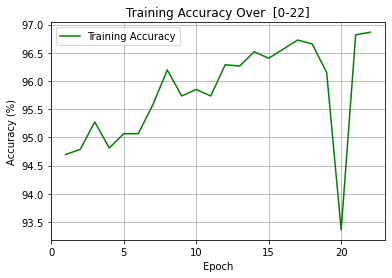

Epoch [23/40], Loss: 0.9361, Accuracy: 96.98%


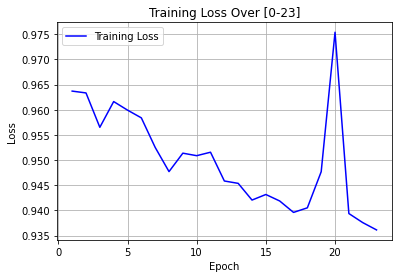

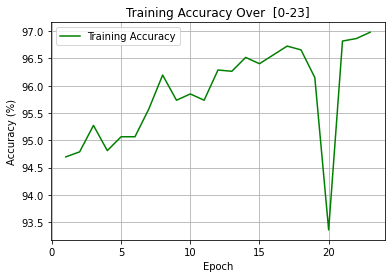

Epoch [24/40], Loss: 0.9427, Accuracy: 96.43%


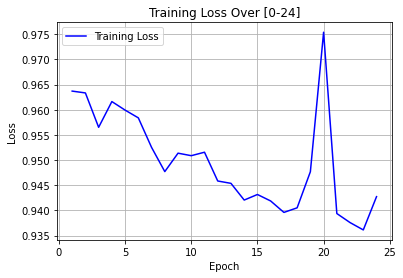

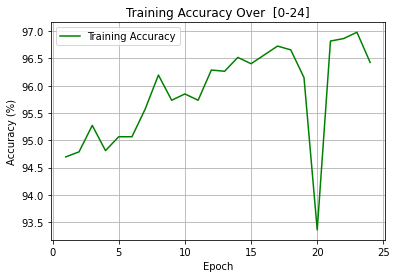

Epoch [25/40], Loss: 0.9368, Accuracy: 97.00%


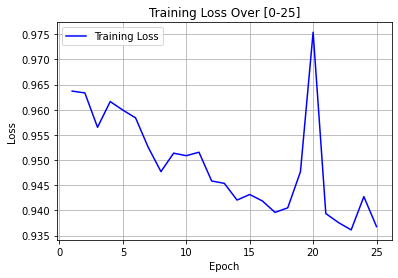

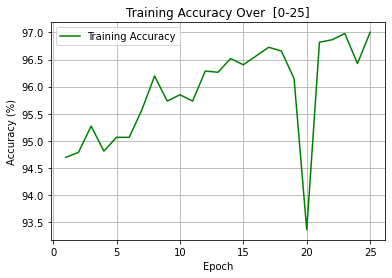

Epoch [26/40], Loss: 0.9385, Accuracy: 96.98%


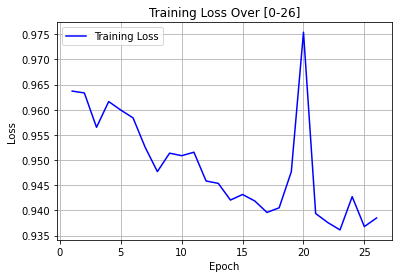

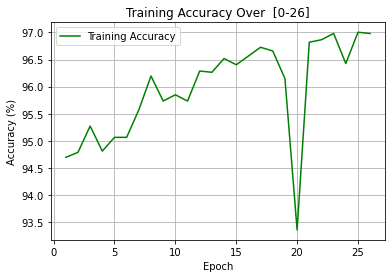

Epoch [27/40], Loss: 0.9428, Accuracy: 96.50%


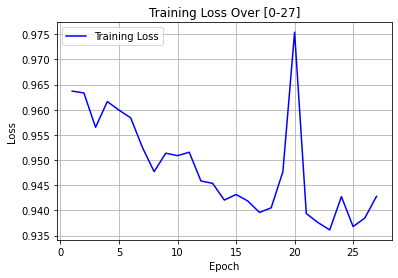

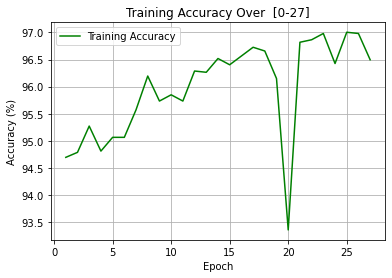

Epoch [28/40], Loss: 0.9382, Accuracy: 96.82%


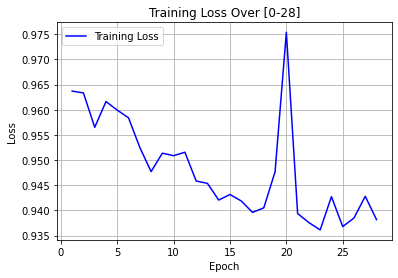

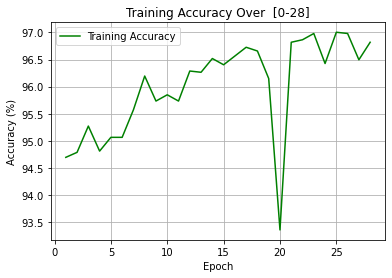

Epoch [29/40], Loss: 0.9361, Accuracy: 97.07%


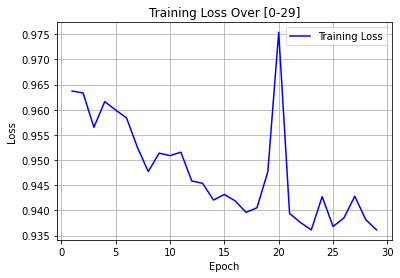

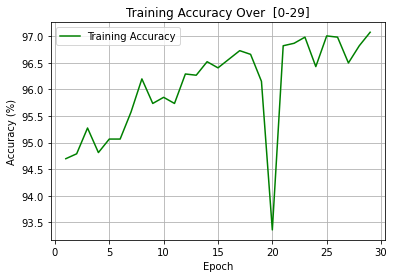

Epoch [30/40], Loss: 0.9411, Accuracy: 96.75%


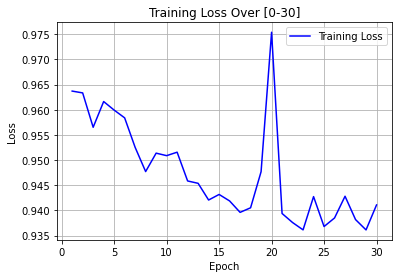

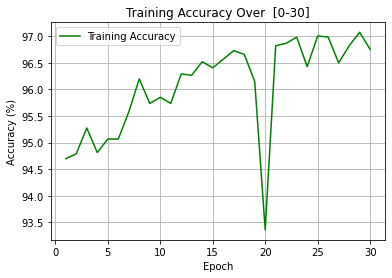

Epoch [31/40], Loss: 0.9326, Accuracy: 97.35%


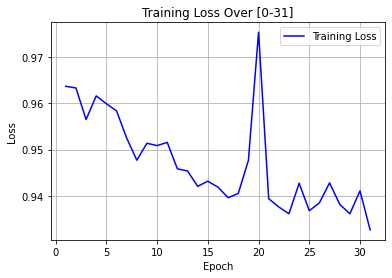

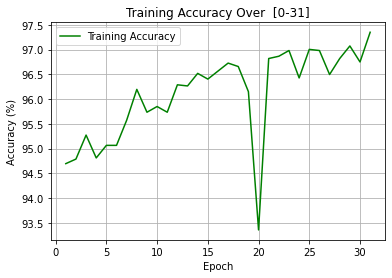

Epoch [32/40], Loss: 0.9323, Accuracy: 97.42%


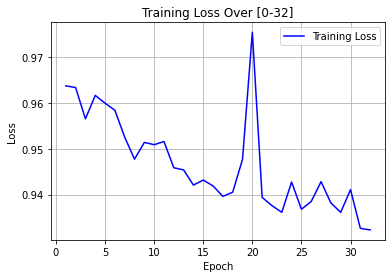

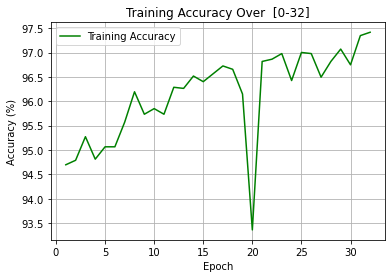

Epoch [33/40], Loss: 0.9310, Accuracy: 97.58%


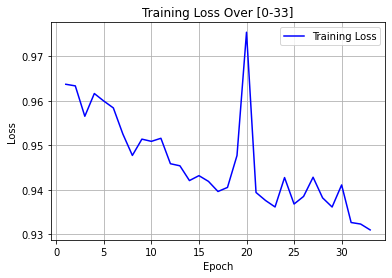

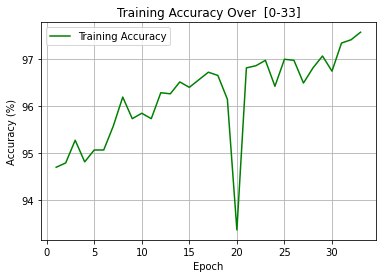

Epoch [34/40], Loss: 0.9394, Accuracy: 96.86%


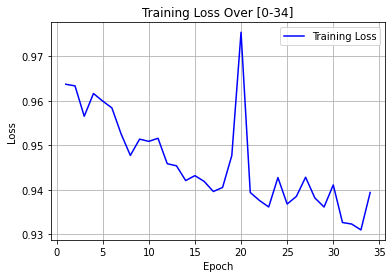

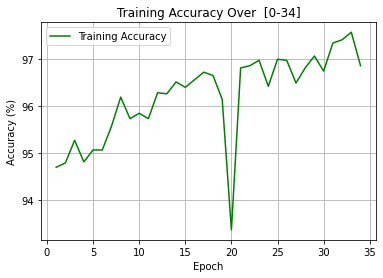

Epoch [35/40], Loss: 0.9291, Accuracy: 97.72%


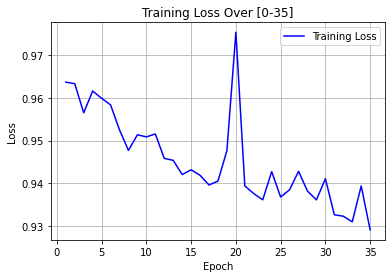

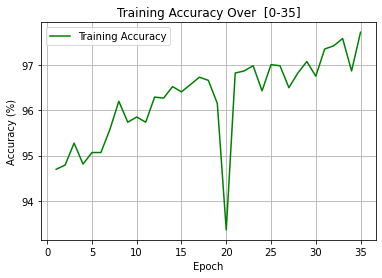

Epoch [36/40], Loss: 0.9285, Accuracy: 97.79%


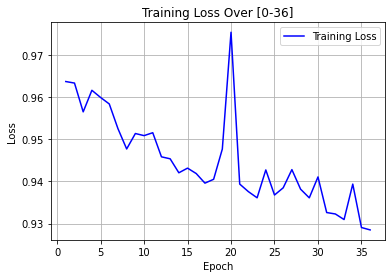

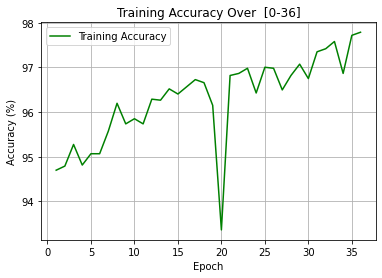

Epoch [37/40], Loss: 0.9273, Accuracy: 97.83%


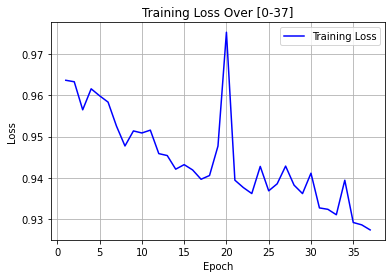

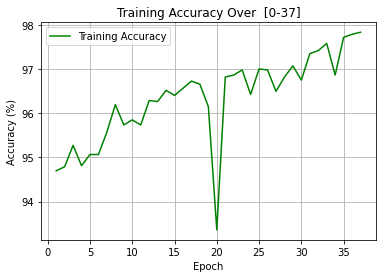

Epoch [38/40], Loss: 0.9330, Accuracy: 97.42%


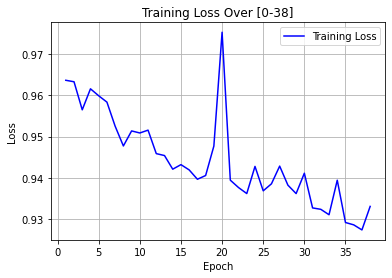

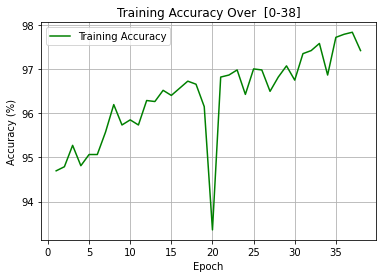

Epoch [39/40], Loss: 0.9397, Accuracy: 96.75%


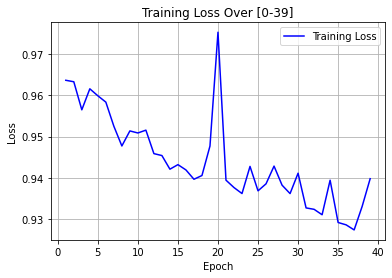

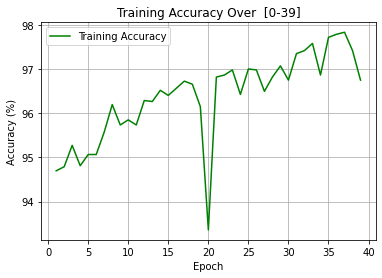

Epoch [40/40], Loss: 0.9334, Accuracy: 97.49%


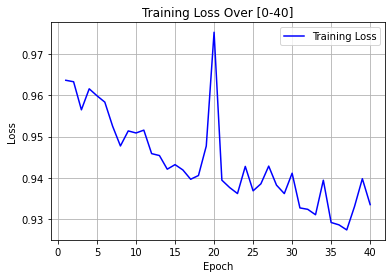

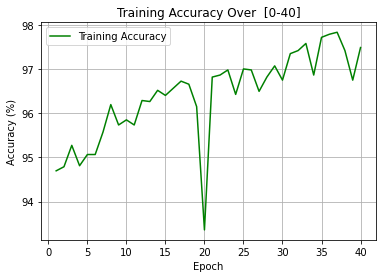

In [39]:
#model_cnn = CNNNetwork().to(device)
trained_model_cnn = train(trained_model_cnn, data_loader, device, 40, criterion = CrossEntropyLoss())

Average Loss: 0.9691
Accuracy: 93.77%


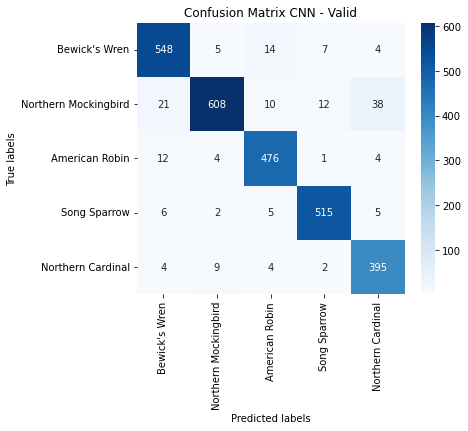

In [40]:
with torch.no_grad():
    predict_total, target_total = test_model(trained_model_cnn,valid_dataloader,device)
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predict_total, target_total)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['name'].unique(), yticklabels=df['name'].unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix CNN - Valid')
plt.show()

Total Incorrect: 91
Average Loss: 0.9380
Accuracy: 96.98%
Masked Error Loss, Average: 0.8733


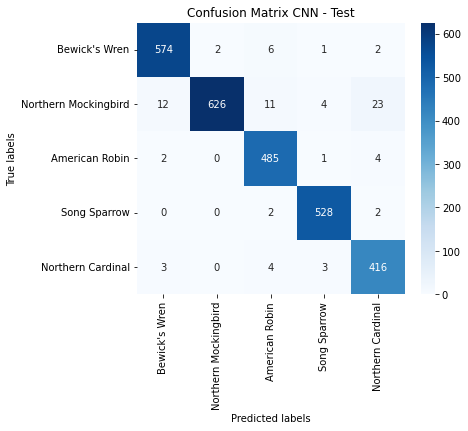

In [68]:
test_audio_dataset = AudioDataset(test_df,AUDIO_DIR=wavfiles_path)
test_dataloader = DataLoader(test_audio_dataset, batch_size=32, shuffle=True)
with torch.no_grad():
    predict_total, target_total = test_model(trained_model_cnn,test_dataloader,device)
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predict_total, target_total)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['name'].unique(), yticklabels=df['name'].unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix CNN - Test')
plt.show()

In [43]:
total_params_cnn = sum(p.numel() for p in trained_model_cnn.parameters() if p.requires_grad)
total_params_lstm = sum(p.numel() for p in trained_model_ltsm.parameters() if p.requires_grad)
print(total_params_cnn, total_params_lstm)

131717 558469
